**Dataset Generation**

These files are CSV versions of statistics taken on fbref.com. They are formatted in columns of statistics, and rows of players. These statistics are the players' totals for each season.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

In [7]:
playerFiles18_19 = [
    "/content/drive/MyDrive/dataset_files/18_19_player/Player Defensive Actions 2018-2019 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/18_19_player/Player Goal and Shot Creation 2018-2019 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/18_19_player/Player Miscellaneous Stats 2018-2019 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/18_19_player/Player Pass Types 2018-2019 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/18_19_player/Player Passing 2018-2019 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/18_19_player/Player Possession 2018-2019 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/18_19_player/Player Shooting 2018-2019 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/18_19_player/Player Standard Stats 2018-2019 Womens Super League.csv"
]

playerFiles19_20 = [
    "/content/drive/MyDrive/dataset_files/19_20_player/Player Defensive Actions 2019-2020 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/19_20_player/Player Goal and Shot Creation 2019-2020 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/19_20_player/Player Miscellaneous Stats 2019-2020 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/19_20_player/Player Pass Types 2019-2020 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/19_20_player/Player Passing 2019-2020 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/19_20_player/Player Possession 2019-2020 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/19_20_player/Player Shooting 2019-2020 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/19_20_player/Player Standard Stats 2019-2020 Womens Super League.csv"
]

playerFiles20_21 = [
    "/content/drive/MyDrive/dataset_files/20_21_player/Player Defensive Actions 2020-2021 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/20_21_player/Player Goal and Shot Creation 2020-2021 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/20_21_player/Player Miscellaneous Stats 2020-2021 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/20_21_player/Player Pass Types 2020-2021 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/20_21_player/Player Passing 2020-2021 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/20_21_player/Player Possession 2020-2021 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/20_21_player/Player Shooting 2020-2021 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/20_21_player/Player Standard Stats 2020-2021 Womens Super League.csv"
]

playerFiles21_22 = [
    "/content/drive/MyDrive/dataset_files/21_22_player/Player Defensive Actions 2021-2022 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/21_22_player/Player Goal and Shot Creation 2021-2022 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/21_22_player/Player Miscellaneous Stats 2021-2022 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/21_22_player/Player Pass Types 2021-2022 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/21_22_player/Player Passing 2021-2022 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/21_22_player/Player Possession 2021-2022 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/21_22_player/Player Shooting 2021-2022 Womens Super League.csv",
    "/content/drive/MyDrive/dataset_files/21_22_player/Player Standard Stats 2021-2022 Womens Super League.csv"
]

**Cleaning Dataset**

Now these CSV files are loaded, we will perform the following actions:


*   Set up a function to clean the data. This will remove symbols, duplicate columns, filter out players with the goalkeeper 'GK' position, and fill in any missing data with '0', which is fine as these stats are a track of the amount of times a player peformed an action, so if there is nothing recorded then chances are the value should be '0'.


In [8]:
def cleanData(playerFiles):
    combined_df = pd.DataFrame() # this stores dataframe in an empty dataframe to avoid errors

    for file in playerFiles:
        df = pd.read_csv(file) # reads through all the files in a loop

        if 'Min' in df.columns:
            df['Min'] = df['Min'].replace({',': ''}, regex=True) # gets rid of symbols which affect the minutes value using a regular expression
            df['Min'] = pd.to_numeric(df['Min'], errors='coerce').fillna(0) # converts values to numeric, if any show error for NaN then they are filled with '0'

        if 'PrgR\n▼' in df.columns:
            df = df.drop(columns=['PrgR\n▼']) # this is due to some columns being saved with the 'sort by' action

        df.columns = [col.replace('▼', '').strip() for col in df.columns] # cleaning columns
        df.columns = [col.replace('▲', '').strip() for col in df.columns]

        df = df[df['Pos'] != 'GK'] # removing goalkeepers as they are not included in this dataset

        df = df.loc[:,~df.columns.duplicated()] # removing duplicated columns in a concise way, with ~ negating the boolean array

        df.fillna(0, inplace=True) # filling in any empty values with 0

        combined_df = pd.concat([combined_df, df], ignore_index=True) # combining the files into one dataframe

    return combined_df

cleaned_df_18_19 = cleanData(playerFiles18_19)
cleaned_df_19_20 = cleanData(playerFiles19_20)
cleaned_df_20_21 = cleanData(playerFiles20_21)
cleaned_df_21_22 = cleanData(playerFiles21_22)

**Formatting Dataset**

Here we are aggregating the data by creating a function. We exclude RK, Born, and 90s as they are not needed for the dataset. We then define that all numerical colums are summed and all string columns are picked by 'the first'.

We overide the function only for Age, as we want the most recent age of players for our dataset. We then group the data by the player and aggregate, ensuring that each players' statistics are their own once this is done.

In [9]:
def aggregate_player_data(df):
    excluded_columns = ['Rk', 'Born', '90s']

    agg_functions = {
        col: 'first' if df[col].dtype in ['float64', 'int64'] else 'first'
        for col in df.columns if col not in excluded_columns
    }

    # Override the aggregation function for 'Age' to use 'last'
    agg_functions['Age'] = 'last'

    # Group by 'Player' and aggregate
    aggregated_df = df.groupby('Player', as_index=False).agg(agg_functions)

    return aggregated_df

final_df_18_19 = aggregate_player_data(cleaned_df_18_19)
final_df_19_20 = aggregate_player_data(cleaned_df_19_20)
final_df_20_21 = aggregate_player_data(cleaned_df_20_21)
final_df_21_22 = aggregate_player_data(cleaned_df_21_22)

df_18_19 = pd.concat([final_df_18_19])
df_19_20 = pd.concat([final_df_19_20])
df_20_21 = pd.concat([final_df_20_21])
df_21_22 = pd.concat([final_df_21_22])

Here we check to ensure there are definitely no duplicated players, as this would dramatically affect the results of the machine learning models. If there isn't, the process has worked.

In [10]:
duplicates_18_19 = df_18_19[df_18_19.duplicated(subset='Player', keep=False)]
duplicates_19_20 = df_19_20[df_19_20.duplicated(subset='Player', keep=False)]
duplicates_20_21 = df_20_21[df_20_21.duplicated(subset='Player', keep=False)]
duplicates_21_22 = df_21_22[df_21_22.duplicated(subset='Player', keep=False)]

print("Duplicates in 18-19 Season:\n", duplicates_18_19)
print("Duplicates in 19-20 Season:\n", duplicates_19_20)
print("Duplicates in 20-21 Season:\n", duplicates_20_21)
print("Duplicates in 21-22 Season:\n", duplicates_21_22)

Duplicates in 18-19 Season:
 Empty DataFrame
Columns: [Player, Pos, Squad, Age, Tkl_plyr, TklW_plyr, Def 3rd_plyr, Mid 3rd_plyr, Att 3rd_plyr, Tkl_drb, Att_drb, Tkl%_drb, Lost_drb, Blocks, Sh, Pass, Int, Tkl+Int, Clr, Err, SCA, SCA90, PassLive_SCA, PassDead_SCA, TO_SCA, Sh_SCA, Fld_SCA, Def_SCA, GCA, GCA90, PassLive_GCA, PassDead_GCA, TO_GCA, Sh_GCA, Fld_GCA, Def_GCA, CrdY, CrdR, 2CrdY, Fls, Fld, Off, Crs, TklW, PKwon, PKcon, OG, Recov, Won, Lost, Won%, Att, Live, Dead, FK, TB, Sw, TI, CK, In, Out, Str, Cmp, Cmp%, TotDist, PrgDist, Cmp_short, Att_short, Cmp%_short, Cmp_med, Att_med, Cmp%_med, Cmp_long, Att_long, Cmp%_long, Ast, xAG, xA, A-xAG, KP, 1/3, PPA, CrsPA, PrgP, Touches, Def Pen, Def 3rd, Mid 3rd, Att 3rd, Att Pen, Att_T/O, Succ_T/O, Succ%_T/O, Tkld_T/O, Tkld%_T/O, Carries, PrgC, CPA, Mis, Dis, ...]
Index: []

[0 rows x 136 columns]
Duplicates in 19-20 Season:
 Empty DataFrame
Columns: [Player, Pos, Squad, Age, Tkl_plyr, TklW_plyr, Def 3rd_plyr, Mid 3rd_plyr, Att 3rd_plyr, Tkl_

**Averaging Dataset**
Now we can fully cocatenate the cleaned and formatted season-dataframes. Once this is complete, we want to work out the mean of each column for each player across the four seasons.

We continue to exclude Age as we still want the last value of this. We repeat previous steps to group by the players to make sure statistics are their own.

Next we dismiss any players who have not played 5% of the total minutes possible over the 4 seasons. This is to drop any players that may have outlier statistics as well as simply not enough data to make a judgement on their ability.

In [11]:
df = pd.concat([df_18_19, df_19_20, df_20_21, df_21_22])

excluded_columns = ['Rk', 'Born', '90s']

agg_functions = {
    col: 'mean' if df[col].dtype in ['float64', 'int64'] else 'last'  # similar to previous code looking for 'first', but here we want the mean
    for col in df.columns if col not in excluded_columns
}

agg_functions['Age'] = 'last'

aggregated_df = df.groupby('Player', as_index=False).agg(agg_functions)

aggregated_df = aggregated_df.round(2) # due to the varied values, we round the resulting mean values down to 2 decimal points for readability

min_threshold = 360
NonMin_df = aggregated_df[aggregated_df['Min'] < min_threshold]
Dataset_df = aggregated_df[aggregated_df['Min'] >= min_threshold]

In [12]:
import numpy as np

This list is made by extracting the columns 'Player', 'Pos', and 'Age' as a backup incase we require it later to pull player data based on any of these colums.

In [13]:
playerInformation = Dataset_df[['Player', 'Pos', 'Age']]
playerInformationList = list(playerInformation.to_records(index=False))

Now we can begin selecting the information from the dataset and using this for clustering. We want to convert the features we want into 'per 90 minute' values. This will result in a dataset which contains features made up of statistics that have been mean averaged, including the minutes value, and then converted to 'per 90' stats through this code: Dataset_df[col + '_per_90'] = (Dataset_df[col] / Dataset_df['Min']) * 90

This standarization of the data allows better readability, and more focused features which now represent a players effect per 90 minutes, where it really counts. This means a player who played once and did well will not show as being better than a player who played all the minutes, scored more, but their mean 'goals' value is less.  

We are dropping all columns deemed to be uneeded, or representations that are already covered by the converted columns, such as 'Sh/90', 'GCA90'. This columns_to_drop contains values that skew the data wildly, such as 'Live_per_90' and 'Touches_per_90' as their values are sky high compared to the others, therefore they unneededly affect the results.

In [14]:
Dataset_df = Dataset_df.copy() # we create a copy of the dataset to avoid error message

columns_to_convert = [
    'Fls', 'Fld', 'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'Won', 'Lost',
    'Att', 'Live', 'Dead', 'FK', 'TB', 'Sw', 'TI', 'CK', 'In', 'Out', 'Str', 'Cmp',
    'TotDist', 'PrgDist', 'Cmp_short', 'Att_short', 'Cmp_med', 'Att_med', 'Cmp_long', 'Att_long',
    'Ast', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Att_T/O', 'Succ_T/O', 'Tkld_T/O',
    'Carries', 'PrgC', 'CPA', 'Mis', 'Dis', 'Rec', 'Gls', 'SoT', 'G/Sh', 'G/SoT', 'Dist', 'PK', 'PKatt',
    'Tkl_plyr', 'TklW_plyr', 'Def 3rd_plyr', 'Mid 3rd_plyr', 'Att 3rd_plyr', 'Tkl_drb', 'Att_drb',  'Lost_drb', 'Blocks',
    'Def_GCA', 'Sh_GCA', 'Sh_SCA', 'Fld_GCA', 'Sh_SCA', 'Fld_GCA', 'TO_GCA', 'SCA', 'PassLive_SCA', 'PassDead_SCA', 'TO_SCA', 'Fld_SCA', 'Def_SCA', 'GCA', 'PassLive_GCA', 'PassDead_GCA', 'Def_GCA',
    'Sh',	'Pass',	'Int',	'Tkl+Int',	'Clr',	'Err'
]

for col in columns_to_convert:
    Dataset_df[col + '_per_90'] = (Dataset_df[col] / Dataset_df['Min']) * 90


Dataset_df.replace([np.inf, -np.inf], np.nan, inplace=True) # handles cases where 'Min' is zero to avoid division by zero errors
Dataset_df.fillna(0, inplace=True)

columns_to_drop = [
    'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'G+A', 'G-PK', 'xG_exp', 'npxG_exp', 'xAG_exp', 'npxG+xAG_exp', 'PrgR',
    'Gls_p90', 'Ast_p90', 'G+A_p90', 'G-PK_p90', 'G+A-PK_p90', 'xG_p90', 'xAG_p90', 'xG+xAG_p90', 'npxG_p90', 'npxG+xAG_p90',
    'xAG', 'xA', 'A-xAG', 'Sh/90', 'SoT/90', 'SCA90', 'GCA90', 'CrdY', 'CrdR', '2CrdY', 'Won%', 'Cmp%', 'Cmp%_short',
    'Cmp%_med', 'Cmp%_long', 'Succ%_T/O', 'Tkld%_T/O', 'SoT%', 'Tkl%_drb', 'Player', 'Pos', 'Squad', 'Age', 'MP', 'Starts',	'Min',
    'Ast_per_90', 'Att_per_90', 'CK_per_90', 'Cmp_per_90', 'GCA_per_90', 'Gls_per_90', 'Live_per_90', 'Dead_per_90', 'Pass_per_90', 'SCA_per_90',
    'Sh_per_90', 'TotDist_per_90', 'Touches_per_90', 'TklW_per_90', 'Tkl+Int_per_90', 'Tkl_plyr_per_90', 'G/Sh_per_90', 'G/SoT_per_90'
]

columns_to_drop = columns_to_drop + columns_to_convert
featuresForVisualisation = Dataset_df.drop(columns_to_drop, axis=1)
featuresForVisualisation = featuresForVisualisation.round(2)
featuresForVisualisation = featuresForVisualisation.reindex(sorted(featuresForVisualisation.columns), axis=1)

Create a table for the appendices to describe each stat. To do this we create a dictionary for Statistics:Descriptions. To then create a table, we need to convert this dictionary into a dataframe. It was then trial and error to get the formatting right.

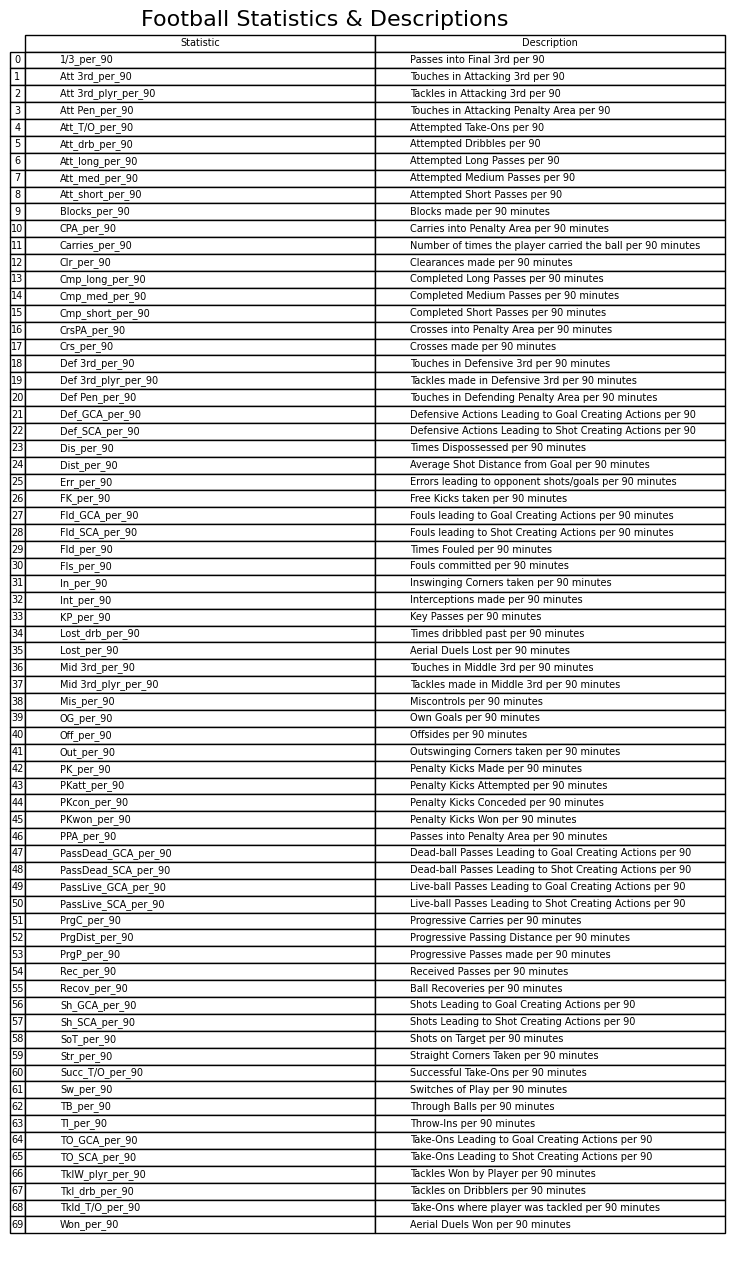

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table

stats_dict = {
    "1/3_per_90": "Passes into Final 3rd per 90",
    "Att 3rd_per_90": "Touches in Attacking 3rd per 90",
    "Att 3rd_plyr_per_90": "Tackles in Attacking 3rd per 90",
    "Att Pen_per_90": "Touches in Attacking Penalty Area per 90",
    "Att_T/O_per_90": "Attempted Take-Ons per 90",
    "Att_drb_per_90": "Attempted Dribbles per 90",
    "Att_long_per_90": "Attempted Long Passes per 90",
    "Att_med_per_90": "Attempted Medium Passes per 90",
    "Att_short_per_90": "Attempted Short Passes per 90",
    "Blocks_per_90": "Blocks made per 90 minutes",
    "CPA_per_90": "Carries into Penalty Area per 90 minutes",
    "Carries_per_90": "Number of times the player carried the ball per 90 minutes",
    "Clr_per_90": "Clearances made per 90 minutes",
    "Cmp_long_per_90": "Completed Long Passes per 90 minutes",
    "Cmp_med_per_90": "Completed Medium Passes per 90 minutes",
    "Cmp_short_per_90": "Completed Short Passes per 90 minutes",
    "CrsPA_per_90": "Crosses into Penalty Area per 90 minutes",
    "Crs_per_90": "Crosses made per 90 minutes",
    "Def 3rd_per_90": "Touches in Defensive 3rd per 90 minutes",
    "Def 3rd_plyr_per_90": "Tackles made in Defensive 3rd per 90 minutes",
    "Def Pen_per_90": "Touches in Defending Penalty Area per 90 minutes",
    "Def_GCA_per_90": "Defensive Actions Leading to Goal Creating Actions per 90",
    "Def_SCA_per_90": "Defensive Actions Leading to Shot Creating Actions per 90",
    "Dis_per_90": "Times Dispossessed per 90 minutes",
    "Dist_per_90": "Average Shot Distance from Goal per 90 minutes",
    "Err_per_90": "Errors leading to opponent shots/goals per 90 minutes",
    "FK_per_90": "Free Kicks taken per 90 minutes",
    "Fld_GCA_per_90": "Fouls leading to Goal Creating Actions per 90 minutes",
    "Fld_SCA_per_90": "Fouls leading to Shot Creating Actions per 90 minutes",
    "Fld_per_90": "Times Fouled per 90 minutes",
    "Fls_per_90": "Fouls committed per 90 minutes",
    "In_per_90": "Inswinging Corners taken per 90 minutes",
    "Int_per_90": "Interceptions made per 90 minutes",
    "KP_per_90": "Key Passes per 90 minutes",
    "Lost_drb_per_90": "Times dribbled past per 90 minutes",
    "Lost_per_90": "Aerial Duels Lost per 90 minutes",
    "Mid 3rd_per_90": "Touches in Middle 3rd per 90 minutes",
    "Mid 3rd_plyr_per_90": "Tackles made in Middle 3rd per 90 minutes",
    "Mis_per_90": "Miscontrols per 90 minutes",
    "OG_per_90": "Own Goals per 90 minutes",
    "Off_per_90": "Offsides per 90 minutes",
    "Out_per_90": "Outswinging Corners taken per 90 minutes",
    "PK_per_90": "Penalty Kicks Made per 90 minutes",
    "PKatt_per_90": "Penalty Kicks Attempted per 90 minutes",
    "PKcon_per_90": "Penalty Kicks Conceded per 90 minutes",
    "PKwon_per_90": "Penalty Kicks Won per 90 minutes",
    "PPA_per_90": "Passes into Penalty Area per 90 minutes",
    "PassDead_GCA_per_90": "Dead-ball Passes Leading to Goal Creating Actions per 90",
    "PassDead_SCA_per_90": "Dead-ball Passes Leading to Shot Creating Actions per 90",
    "PassLive_GCA_per_90": "Live-ball Passes Leading to Goal Creating Actions per 90",
    "PassLive_SCA_per_90": "Live-ball Passes Leading to Shot Creating Actions per 90",
    "PrgC_per_90": "Progressive Carries per 90 minutes",
    "PrgDist_per_90": "Progressive Passing Distance per 90 minutes",
    "PrgP_per_90": "Progressive Passes made per 90 minutes",
    "Rec_per_90": "Received Passes per 90 minutes",
    "Recov_per_90": "Ball Recoveries per 90 minutes",
    "Sh_GCA_per_90": "Shots Leading to Goal Creating Actions per 90",
    "Sh_SCA_per_90": "Shots Leading to Shot Creating Actions per 90",
    "SoT_per_90": "Shots on Target per 90 minutes",
    "Str_per_90": "Straight Corners Taken per 90 minutes",
    "Succ_T/O_per_90": "Successful Take-Ons per 90 minutes",
    "Sw_per_90": "Switches of Play per 90 minutes",
    "TB_per_90": "Through Balls per 90 minutes",
    "TI_per_90": "Throw-Ins per 90 minutes",
    "TO_GCA_per_90": "Take-Ons Leading to Goal Creating Actions per 90",
    "TO_SCA_per_90": "Take-Ons Leading to Shot Creating Actions per 90",
    "TklW_plyr_per_90": "Tackles Won by Player per 90 minutes",
    "Tkl_drb_per_90": "Tackles on Dribblers per 90 minutes",
    "Tkld_T/O_per_90": "Take-Ons where player was tackled per 90 minutes",
    "Won_per_90": "Aerial Duels Won per 90 minutes"
}

stats_df = pd.DataFrame(list(stats_dict.items()), columns=['Statistic', 'Description'])


figsize = (10, 0.2 * len(stats_df) + 2)
fig, ax = plt.subplots(figsize=figsize)
ax.axis('tight')
ax.axis('off')
tab = table(ax, stats_df, loc='center', cellLoc='left', rowLoc='center')
plt.suptitle('Football Statistics & Descriptions', fontsize=16, ha='center')
plt.subplots_adjust(top=0.98, left=0.2, bottom=0.2)
plt.show()

Here to visualise the dataset we create a hatmap using .corr from Seaborn which takes only the numeric columns from the dataset.

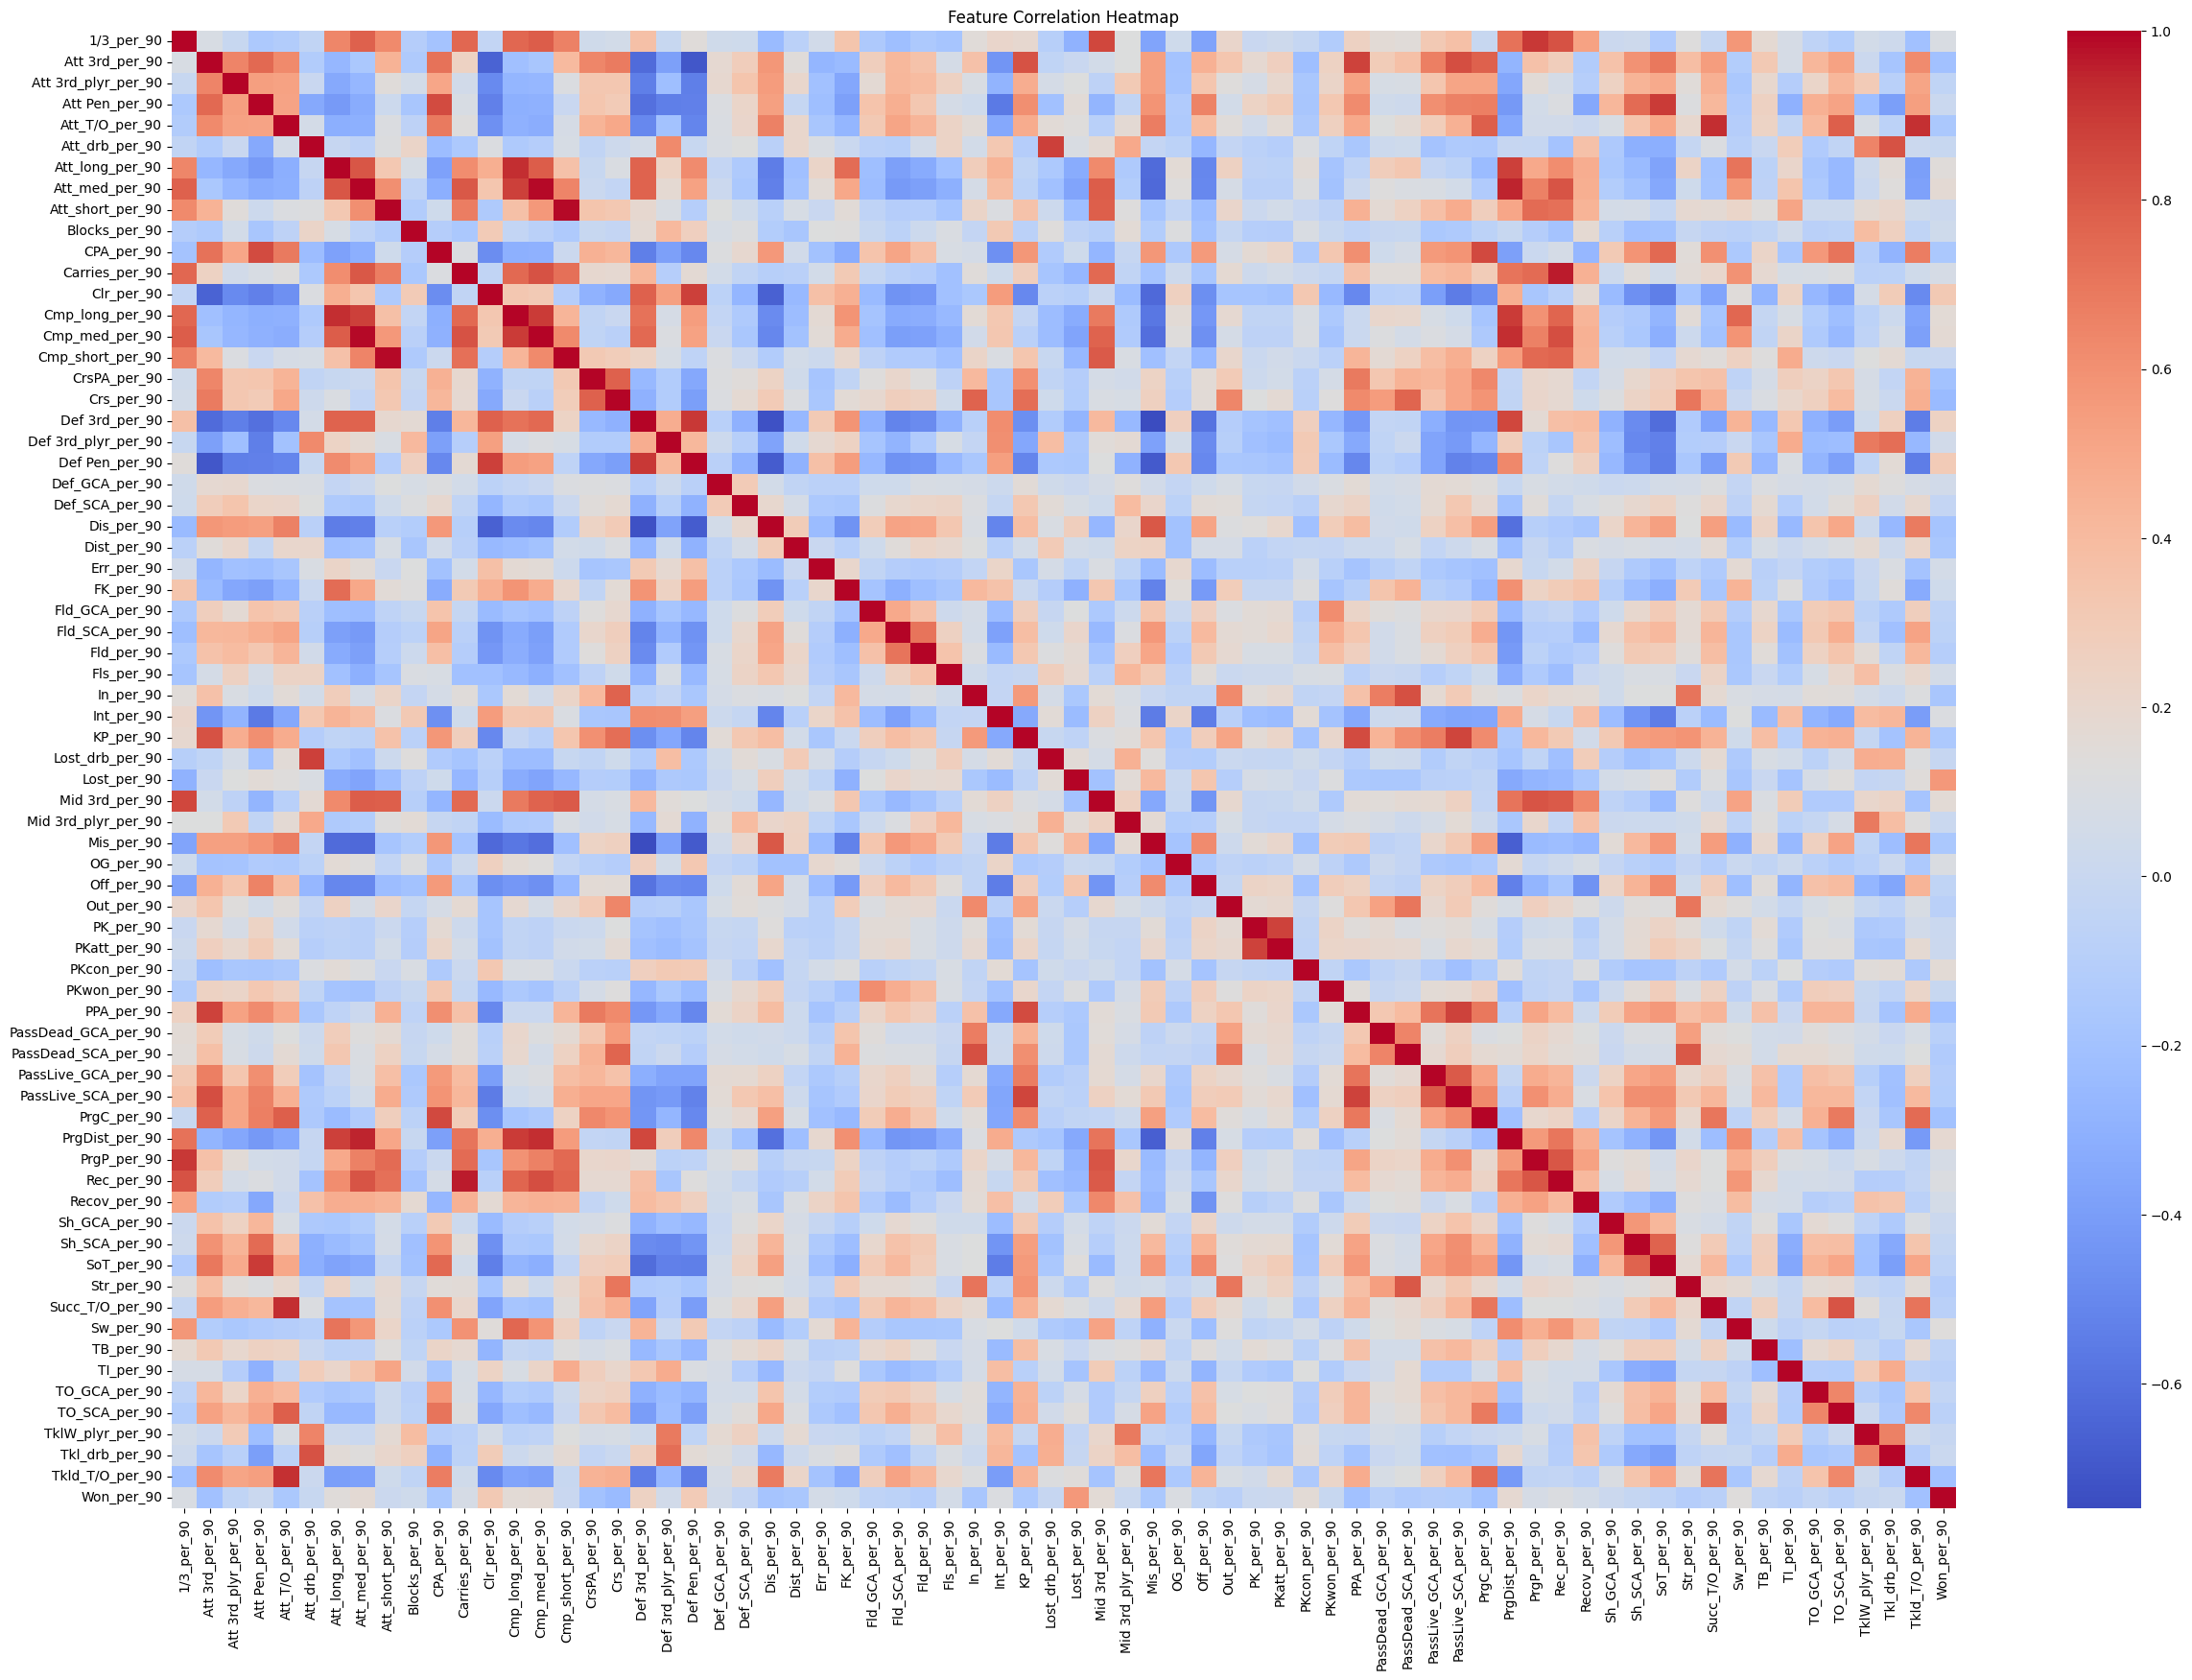

In [16]:
corr_matrix = featuresForVisualisation.corr(numeric_only=True)

plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

Now are done with modifying the data, we can add back that player information so that each row is discernable based on player name, position, and age.

In [17]:
combined_df = pd.merge(playerInformation, featuresForVisualisation, left_index=True, right_index=True)

**Feature Engineering**

Here we use feature engineering which is used to visualise playstyle based on a 'forward' player's playstyle, ie someone whose role it is to produce goals, whether through scoring them themselves, making the last pass to assist a goal, or to move the ball closer to the opposition's goal to increase the chance of a goal scoring situation.

The statistics chosen for each feature are based on domain knowledge, the heatmap above, and online documentation on player roles in football.

In [18]:
def calculate_category_score(df, positive_stats, negative_stats):
    positive_sum = df[positive_stats].sum(axis=1)
    negative_sum = df[negative_stats].sum(axis=1)
    return positive_sum - negative_sum

# Link Up Play
link_up_play_positive = ['Rec_per_90', 'Att_long_per_90', 'Att_med_per_90', 'Att_short_per_90', 'Cmp_long_per_90', 'Cmp_med_per_90', 'Cmp_short_per_90', 'Mid 3rd_per_90']
link_up_play_negative = []

# Dead Ball Play
dead_ball_play_positive = ['In_per_90', 'Out_per_90', 'PassDead_GCA_per_90', 'PassDead_SCA_per_90', 'Str_per_90', 'TI_per_90']
dead_ball_play_negative = []

# Physical Progression
physical_progression_positive = ['Att_T/O_per_90', 'Att_drb_per_90', 'CPA_per_90', 'Carries_per_90', 'Fld_GCA_per_90', 'Fld_SCA_per_90', 'Fld_per_90', 'PrgC_per_90', 'Succ_T/O_per_90', 'TO_GCA_per_90', 'TO_SCA_per_90']
physical_progression_negative = ['Tkld_T/O_per_90']

# Penalty Area Threat
penalty_area_threat_positive = ['Att 3rd_per_90', 'Att Pen_per_90', 'PK_per_90', 'PKatt_per_90', 'PKwon_per_90', 'Sh_GCA_per_90', 'Sh_SCA_per_90', 'SoT_per_90']
penalty_area_threat_negative = ['Dist_per_90', 'Dis_per_90', 'Mis_per_90', 'Off_per_90']

# Technical Progression
technical_progression_positive = ['1/3_per_90', 'CrsPA_per_90', 'Crs_per_90', 'KP_per_90', 'PPA_per_90', 'PassLive_GCA_per_90', 'PassLive_SCA_per_90', 'PrgDist_per_90', 'PrgP_per_90', 'Sw_per_90', 'TB_per_90']
technical_progression_negative = []

# Defensive Actions
defensive_actions_positive = ['Clr_per_90', 'Def 3rd_per_90', 'Def 3rd_plyr_per_90', 'Def Pen_per_90', 'Tkl_drb_per_90']
defensive_actions_negative = ['PKcon_per_90', 'OG_per_90', 'Err_per_90']

# Pressing
pressing_positive = ['Att 3rd_plyr_per_90', 'Blocks_per_90', 'Def_GCA_per_90', 'Def_SCA_per_90', 'Int_per_90', 'Mid 3rd_plyr_per_90', 'Recov_per_90', 'TklW_plyr_per_90']
pressing_negative = ['Lost_drb_per_90']

# Aerial Threat
aerial_threat_positive = ['Won_per_90']
aerial_threat_negative = ['Lost_per_90']

featuresForVisualisation['Link_Up_Play'] = calculate_category_score(featuresForVisualisation, link_up_play_positive, link_up_play_negative)
featuresForVisualisation['Dead_Ball_Play'] = calculate_category_score(featuresForVisualisation, dead_ball_play_positive, dead_ball_play_negative)
featuresForVisualisation['Physical_Progression'] = calculate_category_score(featuresForVisualisation, physical_progression_positive, physical_progression_negative)
featuresForVisualisation['Penalty_Area_Threat'] = calculate_category_score(featuresForVisualisation, penalty_area_threat_positive, penalty_area_threat_negative)
featuresForVisualisation['Technical_Progression'] = calculate_category_score(featuresForVisualisation, technical_progression_positive, technical_progression_negative)
featuresForVisualisation['Defensive_Actions'] = calculate_category_score(featuresForVisualisation, defensive_actions_positive, defensive_actions_negative)
featuresForVisualisation['Pressing'] = calculate_category_score(featuresForVisualisation, pressing_positive, pressing_negative)
featuresForVisualisation['Aerial_Threat'] = calculate_category_score(featuresForVisualisation, aerial_threat_positive, aerial_threat_negative)

combined_df = pd.merge(playerInformation, featuresForVisualisation, left_index=True, right_index=True)

We can now use these features to compare chosen players to other players using visualisation plots. For example, let's compare the top 5 scorers of the 2021-22 season.

First we will MinMax scale the engineered features. The reason for MinMax scaler is we need a representation between 0 and 1 in order to compare the players on a chart.

In [19]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
features = ['Link_Up_Play', 'Dead_Ball_Play', 'Physical_Progression', 'Penalty_Area_Threat', 'Technical_Progression', 'Defensive_Actions', 'Pressing', 'Aerial_Threat']
combined_df[features] = scaler.fit_transform(combined_df[features])

We have created a function to make a radar chart for any player, we just need to input their name.
The code is modified from this source https://www.pythoncharts.com/matplotlib/radar-charts/

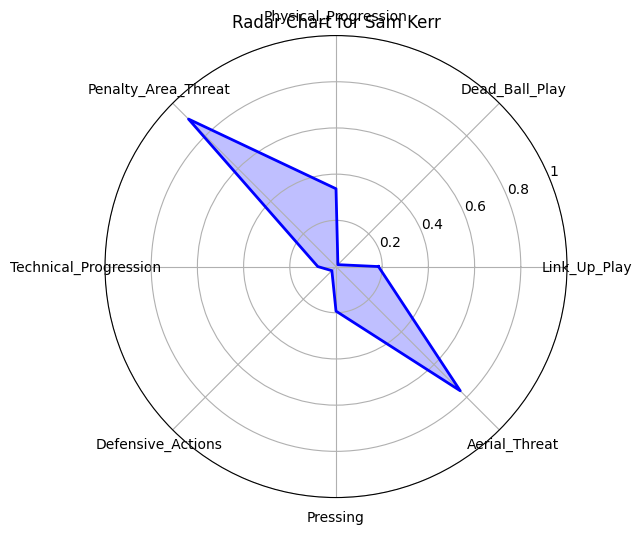

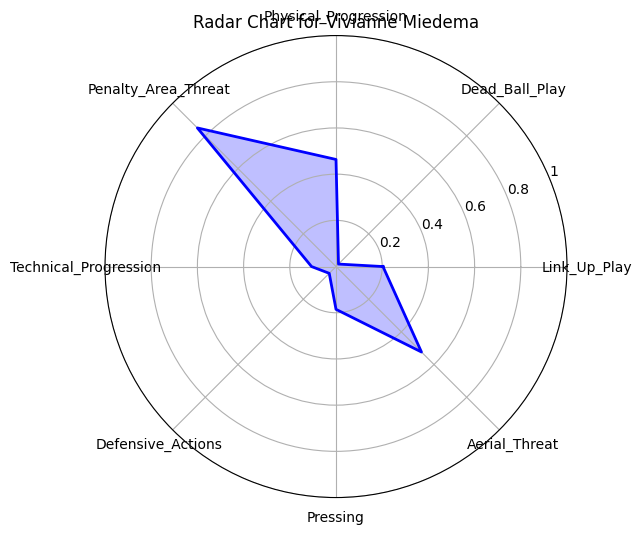

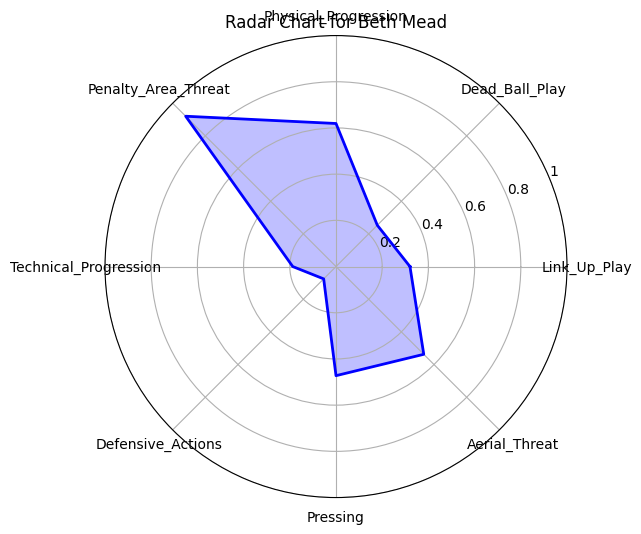

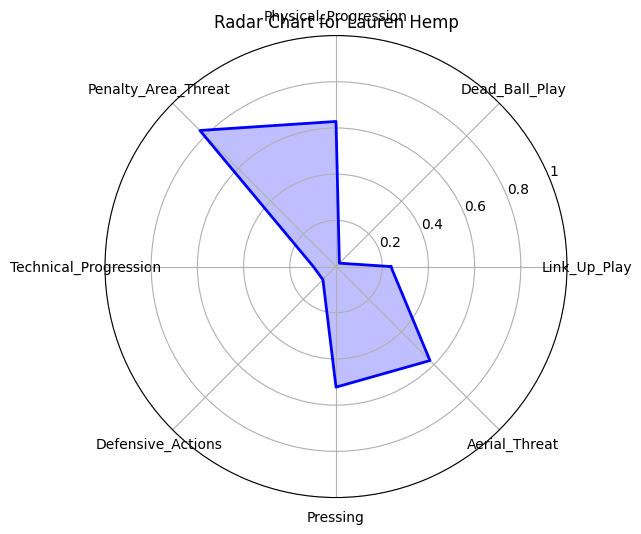

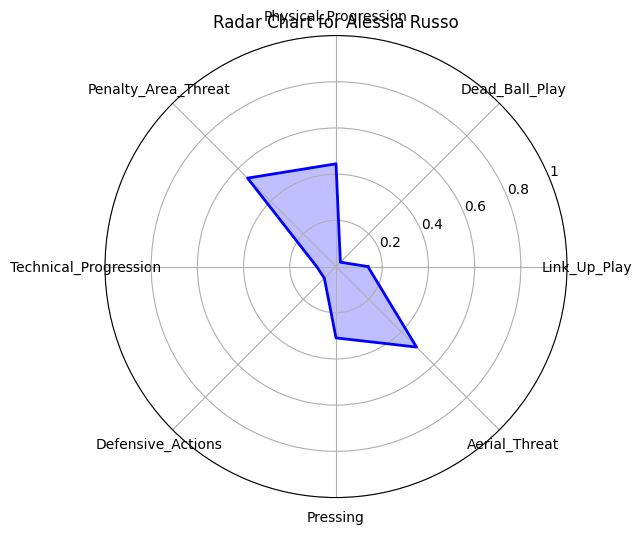

In [20]:
import matplotlib.ticker as ticker

def create_radarChart(player_name, df):
    player_data = df[df['Player'] == player_name]

    categories = [
        'Link_Up_Play', 'Dead_Ball_Play', 'Physical_Progression',
        'Penalty_Area_Threat', 'Technical_Progression',
        'Defensive_Actions', 'Pressing', 'Aerial_Threat'
    ]

    scores = player_data[categories].values.flatten().tolist()
    max_value = 1 # this is necessary otherwise the chart presents different max values per player

    num_vars = len(categories) # this calculates the number of angles as the number of categories

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    scores += scores[:1]
    angles += angles[:1]


    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, scores, color='blue', alpha=0.25)
    ax.plot(angles, scores, color='blue', linewidth=2)
    ax.yaxis.set_major_locator(ticker.FixedLocator([0.2, 0.4, 0.6, 0.8, 1]))
    ax.yaxis.set_major_formatter(ticker.FixedFormatter([0.2, 0.4, 0.6, 0.8, 1]))
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, max_value)
    plt.title('Radar Chart for ' + player_name)
    plt.show()

create_radarChart('Sam Kerr', combined_df)
create_radarChart('Vivianne Miedema', combined_df)
create_radarChart('Beth Mead', combined_df)
create_radarChart('Lauren Hemp', combined_df)
create_radarChart('Alessia Russo', combined_df)

In order to check our results of our future machine learning models are accurate, we need a radar graph that compares a chosen player with other players.

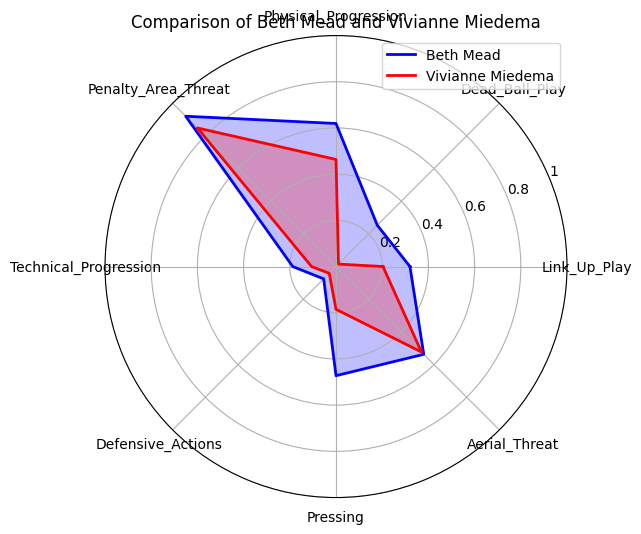

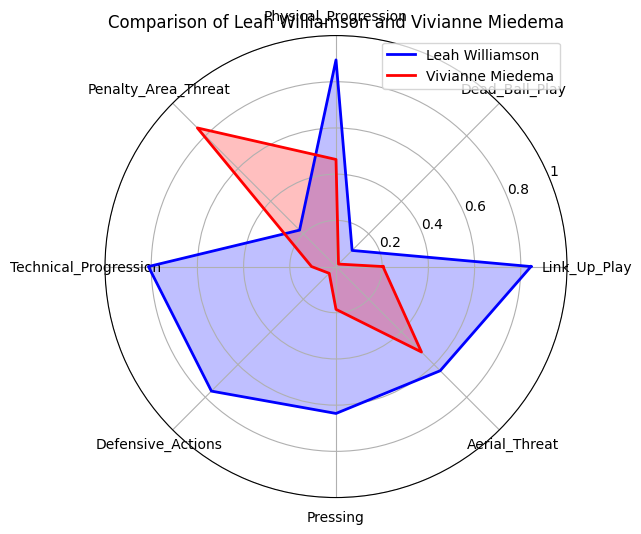

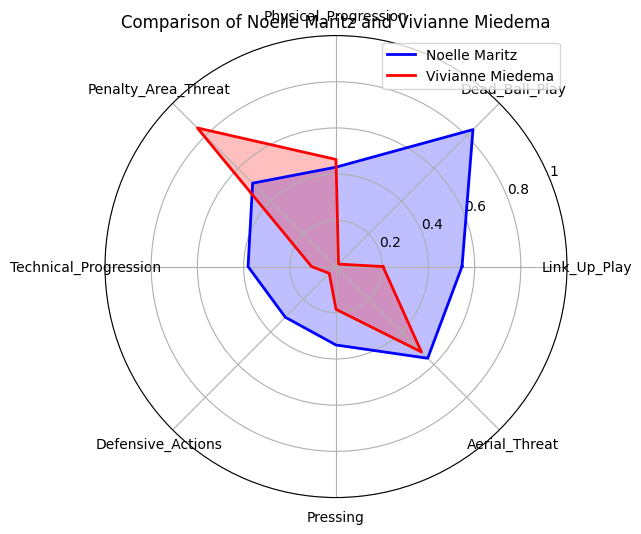

In [21]:
def compare_players_radarChart(player_name1, player_name2, df):
    player_data1 = df[df['Player'] == player_name1]
    player_data2 = df[df['Player'] == player_name2]

    categories = [
        'Link_Up_Play', 'Dead_Ball_Play', 'Physical_Progression',
        'Penalty_Area_Threat', 'Technical_Progression',
        'Defensive_Actions', 'Pressing', 'Aerial_Threat'
    ]

    scores1 = player_data1[categories].values.flatten().tolist()
    scores2 = player_data2[categories].values.flatten().tolist()
    max_value = 1
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    scores1 += scores1[:1]
    scores2 += scores2[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, scores1, color='blue', alpha=0.25)
    ax.plot(angles, scores1, color='blue', linewidth=2, label=player_name1)
    ax.fill(angles, scores2, color='red', alpha=0.25)
    ax.plot(angles, scores2, color='red', linewidth=2, label=player_name2)
    ax.yaxis.set_major_locator(ticker.FixedLocator([0.2, 0.4, 0.6, 0.8, 1]))
    ax.yaxis.set_major_formatter(ticker.FixedFormatter([0.2, 0.4, 0.6, 0.8, 1]))
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, max_value)
    plt.legend(loc='upper right')
    plt.title(f'Comparison of {player_name1} and {player_name2}')
    plt.show()

compare_players_radarChart('Beth Mead', 'Vivianne Miedema', combined_df)
compare_players_radarChart('Leah Williamson', 'Vivianne Miedema', combined_df)
compare_players_radarChart('Noelle Maritz', 'Vivianne Miedema', combined_df)

Now we have the process for validating the results of the ML Models, we can move onto using them. Here we are dropping those engineered features, as they will skew the data into being to specific. We want the ML Models to use all the data so we can see how they react and what results they give.

In [22]:
featuresForClustering = featuresForVisualisation.drop(['Link_Up_Play', 'Dead_Ball_Play', 'Physical_Progression',
                                                       'Penalty_Area_Threat', 'Technical_Progression', 'Defensive_Actions',
                                                       'Pressing', 'Aerial_Threat'], axis = 1)
print(featuresForClustering.columns)
featuresForClustering.info # this is to check the engineered features have been correctly dropped

Index(['1/3_per_90', 'Att 3rd_per_90', 'Att 3rd_plyr_per_90', 'Att Pen_per_90',
       'Att_T/O_per_90', 'Att_drb_per_90', 'Att_long_per_90', 'Att_med_per_90',
       'Att_short_per_90', 'Blocks_per_90', 'CPA_per_90', 'Carries_per_90',
       'Clr_per_90', 'Cmp_long_per_90', 'Cmp_med_per_90', 'Cmp_short_per_90',
       'CrsPA_per_90', 'Crs_per_90', 'Def 3rd_per_90', 'Def 3rd_plyr_per_90',
       'Def Pen_per_90', 'Def_GCA_per_90', 'Def_SCA_per_90', 'Dis_per_90',
       'Dist_per_90', 'Err_per_90', 'FK_per_90', 'Fld_GCA_per_90',
       'Fld_SCA_per_90', 'Fld_per_90', 'Fls_per_90', 'In_per_90', 'Int_per_90',
       'KP_per_90', 'Lost_drb_per_90', 'Lost_per_90', 'Mid 3rd_per_90',
       'Mid 3rd_plyr_per_90', 'Mis_per_90', 'OG_per_90', 'Off_per_90',
       'Out_per_90', 'PK_per_90', 'PKatt_per_90', 'PKcon_per_90',
       'PKwon_per_90', 'PPA_per_90', 'PassDead_GCA_per_90',
       'PassDead_SCA_per_90', 'PassLive_GCA_per_90', 'PassLive_SCA_per_90',
       'PrgC_per_90', 'PrgDist_per_90', '

<bound method DataFrame.info of      1/3_per_90  Att 3rd_per_90  Att 3rd_plyr_per_90  Att Pen_per_90  \
0          2.94            6.43                 0.28            0.39   
1          1.17           17.50                 0.55            3.36   
2          0.61            4.64                 0.00            0.00   
3          2.80            6.04                 0.07            0.84   
4          9.07            1.26                 0.00            0.28   
..          ...             ...                  ...             ...   
429        1.86           26.87                 0.33            8.39   
430        2.82            1.50                 0.00            0.00   
432        1.47           10.80                 0.15            1.47   
433        4.38           14.31                 0.25            0.99   
434        2.28            9.57                 0.16            0.94   

     Att_T/O_per_90  Att_drb_per_90  Att_long_per_90  Att_med_per_90  \
0              0.52            1.78             7.02           15.31   
1              1.17            1.48             2.11            9.45   
2              0.00            1.61             3.23            8.27   
3              0.42            0.51             9.82           24.58   
4              0.00            0.28            13.53           49.67   
..              ...             ...              ...             ...   
429            2.03            0.63             3.34           10.61   
430            0.19            0.38             3.19           20.10   
432            2.07            1.70             4.57            8.22   
433            1.17            0.62             6.97           16.84   
434            1.02            1.18             5.18           15.30   

     Att_short_per_90  Blocks_per_90  ...  Succ_T/O_per_90  Sw_per_90  \
0               16.19           1.24  ...             0.34       0.54   
1               13.05           1.09  ...             0.55       0.08   
2                7.67           0.81  ...             0.00       0.00   
3               18.47           1.28  ...             0.33       0.19   
4               19.67           0.42  ...             0.00       0.42   
..                ...            ...  ...              ...        ...   
429             12.39           0.76  ...             1.04       0.33   
430             16.16           0.38  ...             0.19       0.19   
432             10.77           1.57  ...             1.27       0.22   
433             14.99           1.11  ...             0.86       0.31   
434             13.50           1.33  ...             0.47       0.24   

     TB_per_90  TI_per_90  TO_GCA_per_90  TO_SCA_per_90  TklW_plyr_per_90  \
0         0.05       0.18           0.00           0.03              1.65   
1         0.00       0.70           0.00           0.16              0.86   
2         0.00       5.25           0.00           0.00              1.21   
3         0.00       3.03           0.02           0.02              0.65   
4         0.00       0.14           0.00           0.00              0.28   
..         ...        ...            ...            ...               ...   
429       0.12       0.19           0.12           0.42              0.50   
430       0.00       0.00           0.00           0.00              0.38   
432       0.05       1.50           0.00           0.05              1.25   
433       0.00       0.86           0.06           0.12              1.30   
434       0.00       3.37           0.00           0.00              1.02   

     Tkl_drb_per_90  Tkld_T/O_per_90  Won_per_90  
0              0.65             0.18        1.81  
1              0.55             0.63        0.39  
2              0.81             0.00        0.20  
3              0.30             0.09        1.05  
4              0.14             0.00        1.12  
..              ...              ...         ...  
429            0.20             0.98        0.75  
430            0.38         

**K-Means Clustering: No Principal Component Analysis**

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

The first step is to standardize our dataset. As we will be using a standard scaler for all three ML Models, we can use this scaled_features from now on.

In [24]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(featuresForClustering)
scaled_features

array([[ 0.37517084, -0.7466041 ,  0.19742374, ...,  0.48188425,
        -0.73753582,  1.12832278],
       [-0.7341274 ,  0.70807013,  1.53003396, ...,  0.14930479,
         0.24275861, -0.82123962],
       [-1.08509181, -0.98182242, -1.18454242, ...,  1.01401139,
        -1.12965359, -1.08209656],
       ...,
       [-0.54611075, -0.172356  , -0.44420341, ...,  1.14704318,
         0.61309205,  1.96581085],
       [ 1.27765076,  0.28888217,  0.04935593, ..., -0.44933825,
        -0.45433965, -1.27430694],
       [-0.03846579, -0.33398647, -0.39484747, ..., -0.11675878,
         0.06848404, -0.28579643]])

**Elbow Method**

Here we are creating an elbow graph that produces the results for the cluster range between 1 and 20 using the same parameters as we will use for the actual clustering with KMeans. This allows us to determine clearly where the line 'elbows', which in this case is around the '7' mark, and the Within-Cluster Sum of Squares score has decreased by 10,000.

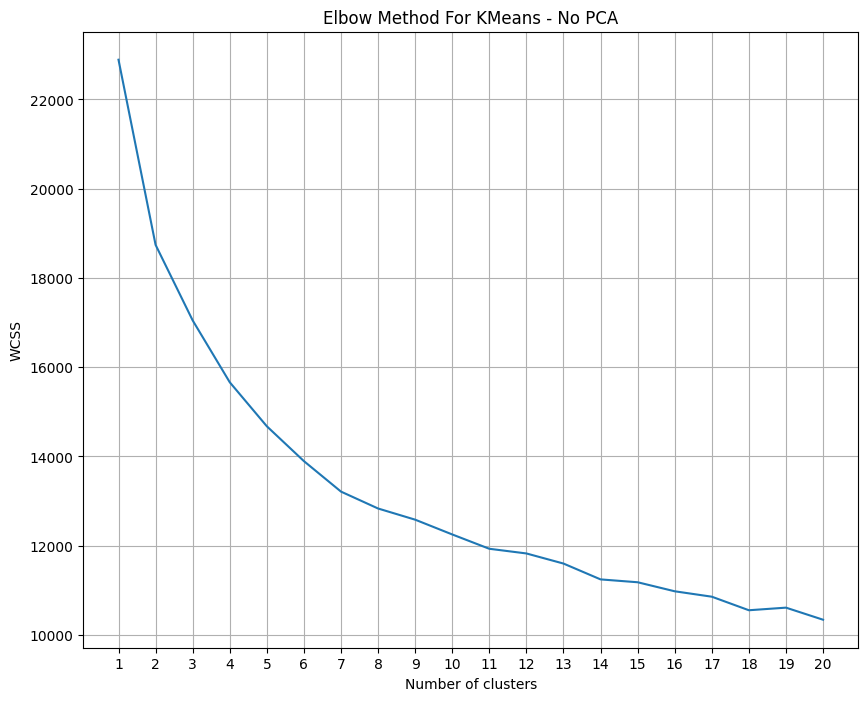

In [25]:
wcss = [] # within cluster sum of squares
range_n_clusters = list(range(1, 21))
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42) # n_init set to 10 to avoid error message
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range_n_clusters, wcss)
plt.title('Elbow Method For KMeans - No PCA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

**Silhouette Score**

Next we create a plot for the silhouette score. We follow a similar idea to the elbow graph and plot for a range of scores, from 2 to 20. As above, we run through the range using the same KMeans parameters as we will for actual clustering.

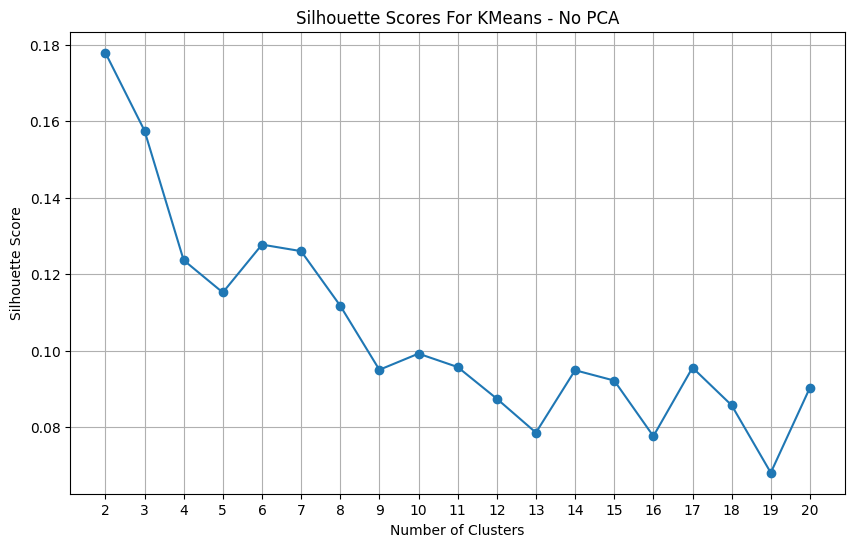

In [26]:
silhouette_avg_scores = []
for n_clusters in range(2, 21):  # silhouette scores start from 2 clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_avg_scores, marker='o')
plt.title('Silhouette Scores For KMeans - No PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()

**KMeans Clustering without PCA**

Now we perform the clustering based on the results of the elbow method and silhouette score. 7 appears to be the optimal cluster value, so we will use this. The paramaters are available to be tweaked for testing.

The results of the clustering can be seen through the code which counts each value and tallies them up, producing a list of results so we can clearly see how many players are in each cluster.

The cluster labels is added onto the end of the combined_df dataset and we check this by printing kmeans_noPCA_df.

In [27]:
n_clusters = 7
kmeans_optimal = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_optimal.fit(scaled_features)

cluster_labels = kmeans_optimal.labels_

combined_df['Cluster_Labels'] = cluster_labels
kmeans_noPCA_df = combined_df

# kmeans_noPCA_df.to_csv('/content/drive/MyDrive/kmeans_noPCA_df.csv', index=False)

noPCA_clustercount = kmeans_noPCA_df['Cluster_Labels'].value_counts()
print("Cluster results:")
print(noPCA_clustercount)
kmeans_noPCA_df

Cluster results:
Cluster_Labels
1    82
0    78
5    58
6    35
3    35
2    22
4    17
Name: count, dtype: int64


Player    Pos   Age  1/3_per_90  Att 3rd_per_90  \
0    Abbey-Leigh Stringer  MF,FW  26.0        2.94            6.43   
1              Abbi Grant     FW  25.0        1.17           17.50   
2             Abbie Cowie     DF   0.0        0.61            4.64   
3           Abbie McManus  DF,MF  28.0        2.80            6.04   
4         Abby Dahlkemper     DF  27.0        9.07            1.26   
..                    ...    ...   ...         ...             ...   
429      Vivianne Miedema  FW,MF  25.0        1.86           26.87   
430          Vyan Sampson  DF,MF  22.0        2.82            1.50   
432          Yana Daniels  MF,FW  28.0        1.47           10.80   
433          Yui Hasegawa  MF,FW  24.0        4.38           14.31   
434           Zaneta Wyne  DF,MF  31.0        2.28            9.57   

     Att 3rd_plyr_per_90  Att Pen_per_90  Att_T/O_per_90  Att_drb_per_90  \
0                   0.28            0.39            0.52            1.78   
1                   0.55            3.36            1.17            1.48   
2                   0.00            0.00            0.00            1.61   
3                   0.07            0.84            0.42            0.51   
4                   0.00            0.28            0.00            0.28   
..                   ...             ...             ...             ...   
429                 0.33            8.39            2.03            0.63   
430                 0.00            0.00            0.19            0.38   
432                 0.15            1.47            2.07            1.70   
433                 0.25            0.99            1.17            0.62   
434                 0.16            0.94            1.02            1.18   

     Att_long_per_90  ...  Won_per_90  Link_Up_Play  Dead_Ball_Play  \
0               7.02  ...        1.81      0.335974        0.010969   
1               2.11  ...        0.39      0.182538        0.057282   
2               3.23  ...        0.20      0.041393        0.319927   
3               9.82  ...        1.05      0.449099        0.194394   
4              13.53  ...        1.12      0.879648        0.008531   
..               ...  ...         ...           ...             ...   
429             3.34  ...        0.75      0.203409        0.015235   
430             3.19  ...        1.13      0.316341        0.000000   
432             4.57  ...        2.42      0.146209        0.118221   
433             6.97  ...        0.06      0.309577        0.101767   
434             5.18  ...        0.78      0.242251        0.205363   

     Physical_Progression  Penalty_Area_Threat  Technical_Progression  \
0                0.337731             0.136545               0.209657   
1                0.425368             0.432902               0.063603   
2                0.045797             0.168978               0.159274   
3                0.393894             0.215981               0.453519   
4                0.936864             0.081551               0.937485   
..                    ...                  ...                    ...   
429              0.463626             0.848649               0.105898   
430              0.301545             0.106228               0.281620   
432              0.343950             0.258049               0.110499   
433              0.382586             0.342891               0.263876   
434              0.297776             0.279671               0.220791   

     Defensive_Actions  Pressing  Aerial_Threat  Cluster_Labels  
0             0.349581  0.686932       0.754527               0  
1             0.107612  0.411600       0.420523               1  
2             0.305745  0.377358       0.561368               5  
3             0.652635  0.593291       0.607646               5  
4             0.841114  0.362683       0.674044               2  
..                 ...       ...            ...             ...  
429           0.041462  0.185185       0.523139               6  
430    

**TSNE Visualisation**

To visualise these clusters and if they are clearly seperated we can use a -Distributed Stochastic Neighbour Embedding plot. This plot uses the cluster labels to differentiate the clusters and allows us to determine if the clusters are clearly defined. The TSNE reduces the dimensionality of the data into 3 components and calculates the pairwise distance using Euclidean metrics.

The visualisation shows that while there is distinction between clusters, it is still cluttered and there are many overlaps, so this does not provide the clearest seperation.

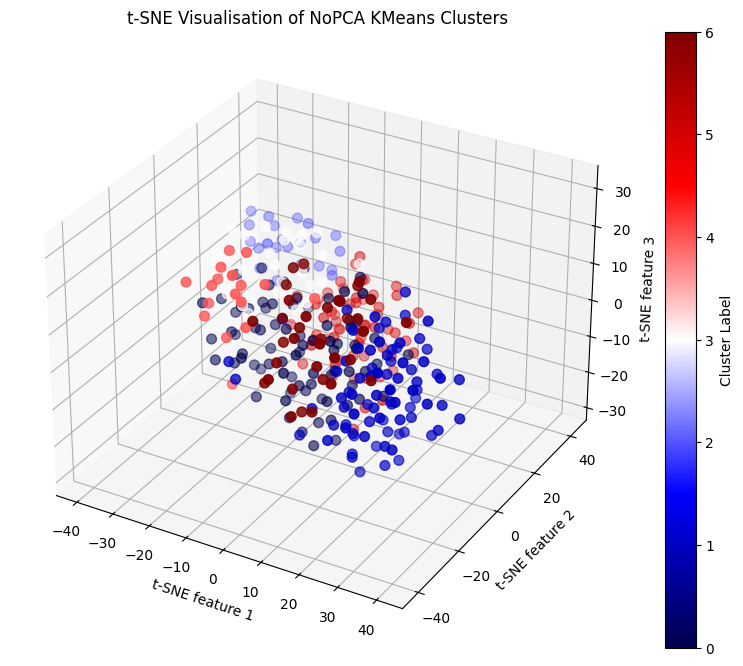

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42) # 2 for 2D, 3 for 3D
tsne_results = tsne.fit_transform(scaled_features) # uses the scaled features data so it is consistent with the clustering results

tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2', 'TSNE3']) # like the table of stats and descriptions, we need to make a dataframe to store the results
tsne_df['Cluster_Labels'] = cluster_labels # we add on the cluster labels. This is why this step is done after the clustering, otherwise we would not be able to differentiate between clusters.

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], tsne_df['TSNE3'],
                     c=tsne_df['Cluster_Labels'], cmap='seismic', s=50)
ax.set_title('t-SNE Visualisation of NoPCA KMeans Clusters')
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('t-SNE feature 3')
fig.colorbar(scatter, ax=ax, label='Cluster Label')
plt.show()

For the goal of this task, we need to find out which cluster Miedema is in and then compare her with all under 24 players in that cluster. Here we are determining which cluster she is in.

In [29]:
player_name = "Vivianne Miedema"
player_cluster = kmeans_noPCA_df[kmeans_noPCA_df['Player'] == player_name]['Cluster_Labels']

if len(player_cluster) == 0:
    print(f"No data found for player: {player_name}")
else:
    print(f"Cluster for {player_name}: {player_cluster.iloc[0]}")

Cluster for Vivianne Miedema: 6


Now we validate results by comparing players under 24 in same cluster as Miedema by printing the list of names, and generating a comparison radar chart for each player.

Positively, we can see clear similarities in playstyle between the players and Miedema. Some such as Chloe Kelly and Hemp match her actual score out of 1 in area, whilst others such as Salmon share a similar shape indicating that they perform similar actions, but just not as consistently.

Players in the same cluster as Vivianne Miedema and under the age of 24:
Alessia Russo
Chloe Kelly
Ebony Salmon
Ella Toone
Georgia Stanway
Jessica Naz
Kirsty Hanson
Lauren Hemp
Lauren James
Niamh Charles
Nicoline Sørensen
Rinsola Babajide


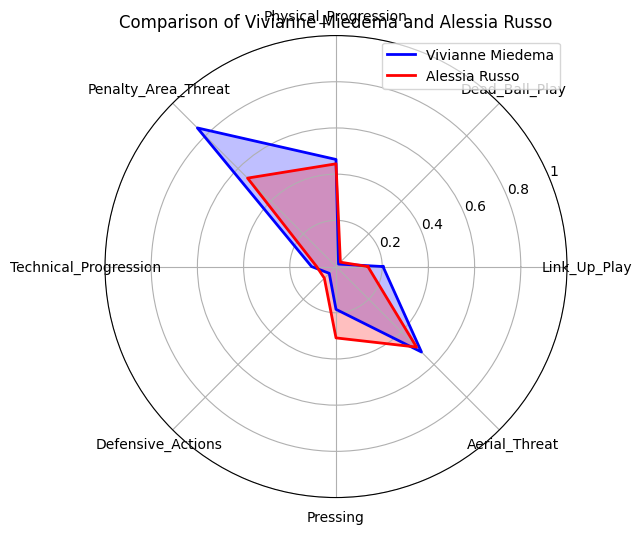

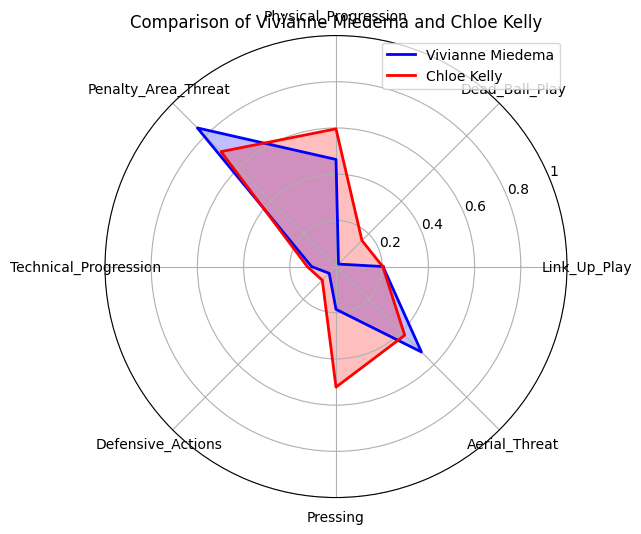

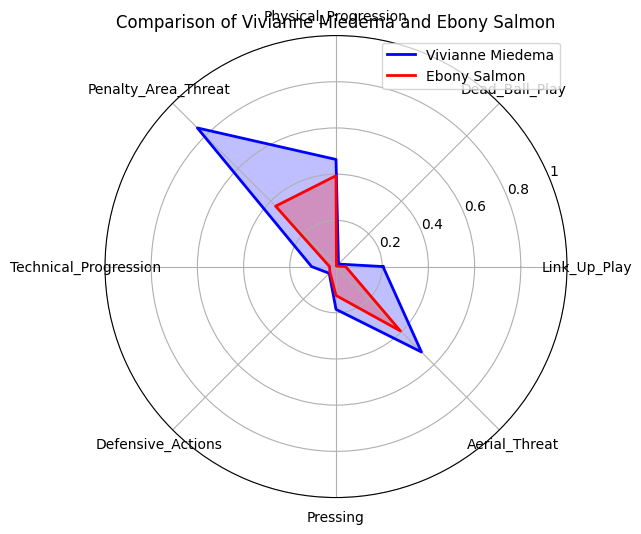

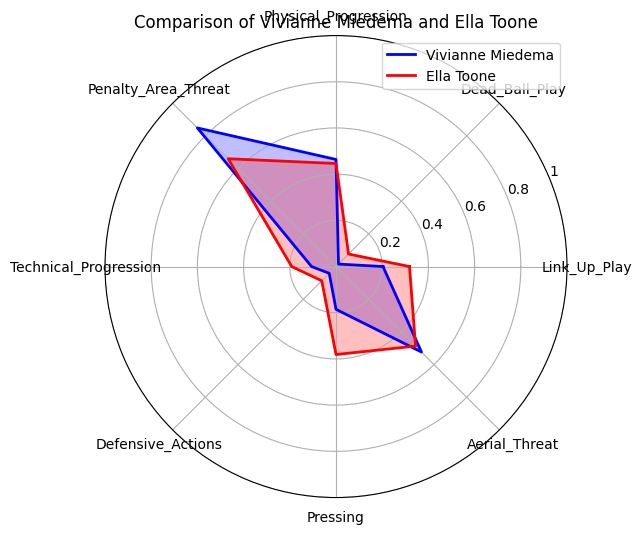

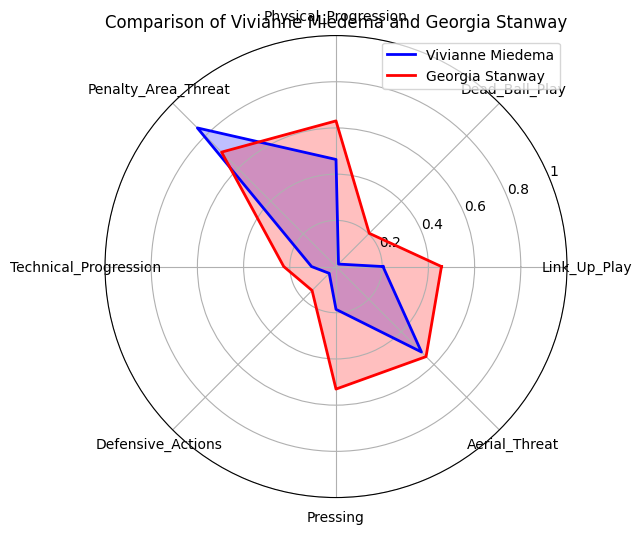

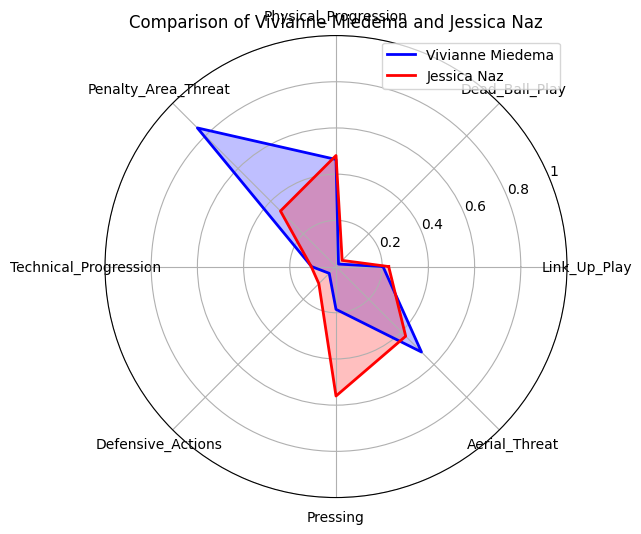

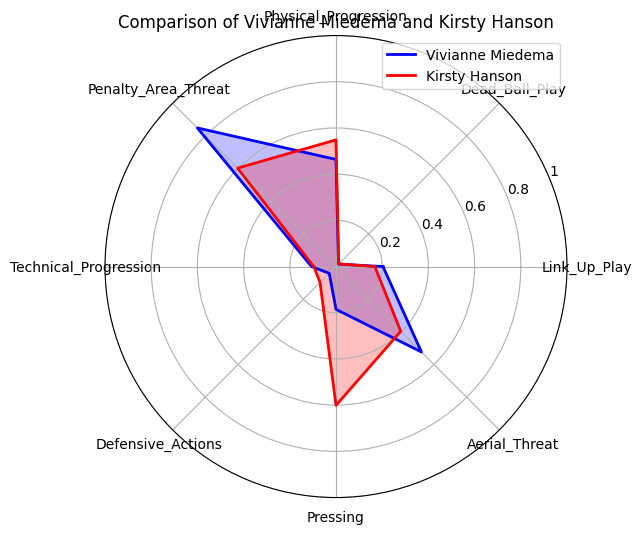

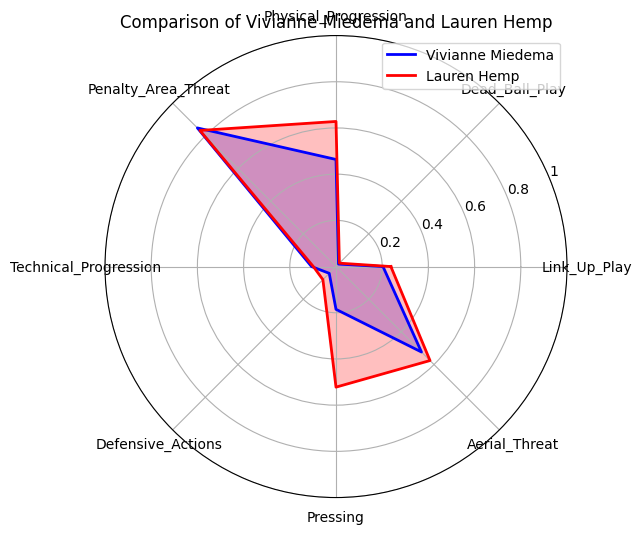

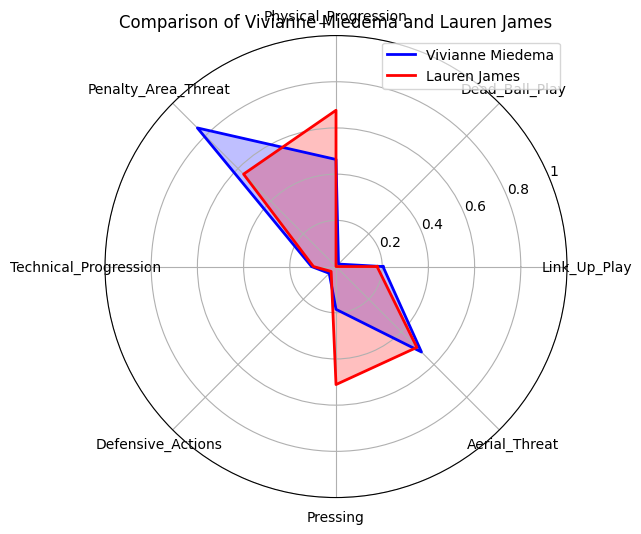

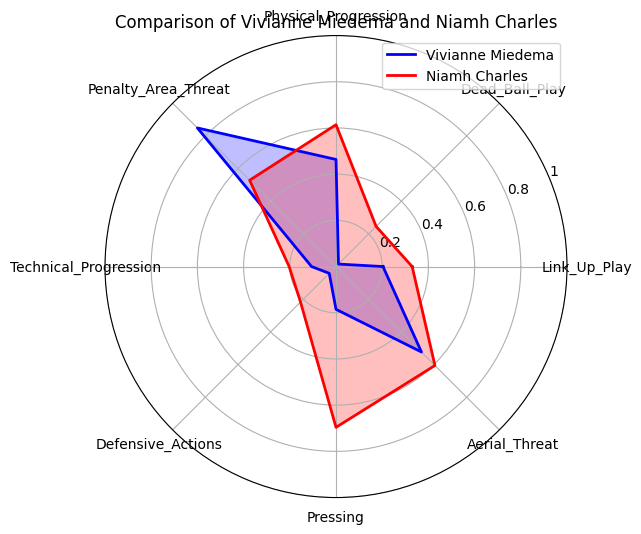

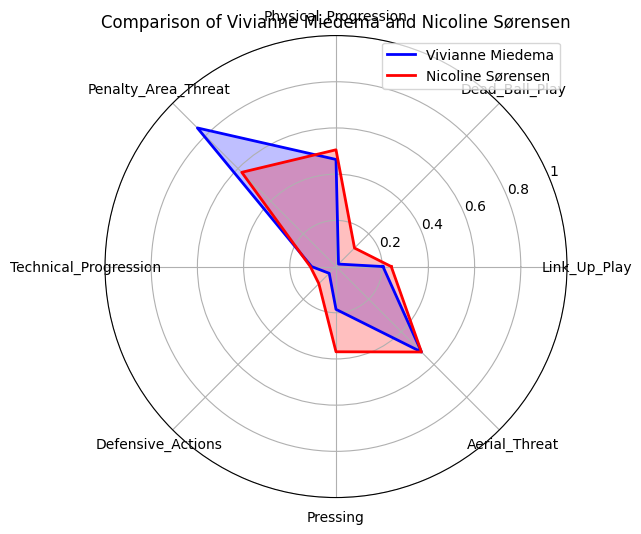

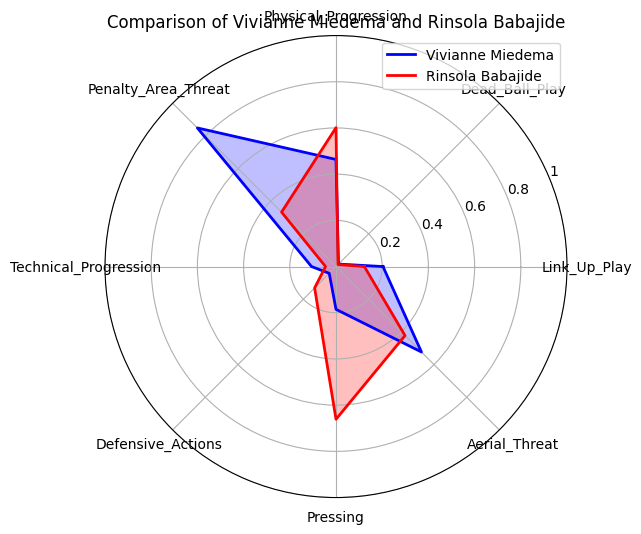

In [30]:
player_cluster_label = kmeans_noPCA_df[kmeans_noPCA_df['Player'] == player_name]['Cluster_Labels'].iloc[0]
age_limit = 24

noPCA_similarplayers = kmeans_noPCA_df[(kmeans_noPCA_df['Cluster_Labels'] == player_cluster_label) & (kmeans_noPCA_df['Age'] < age_limit)]


print(f"Players in the same cluster as {player_name} and under the age of {age_limit}:")
for player in noPCA_similarplayers['Player']:
    print(player)

for other_player in noPCA_similarplayers['Player']: # create a loop to generate a radar comparision chart for each player in the list
    if other_player != player_name:  # make sure we dont compare Miedema with herself
        compare_players_radarChart(player_name, other_player, kmeans_noPCA_df)

**K-Means Clustering: With Principal Component Analysis**

Now we run PCA to find out the optimal number of components. Here we can test results by using different numbers of components, such as each number that sits between 80%-90& of Cumulative Exmplained Variance.


In [31]:
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(scaled_features) # adding our scaled data
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_) # the code to calculate the cumulative explained variance

plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.text(0.5, 0.85, '90% explained variance', color = 'red')
plt.grid(True)
plt.show()


n_components = 24 # based on the plot, we can select our number of components. For this we will select 24, as this is where the number of components sits on 0.9(90%) of CEV
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_features) # now we save a variable for our transformed scaled features based on our chose principal components

Repeat our operation for calculating the Elbow Method, this time with PCA

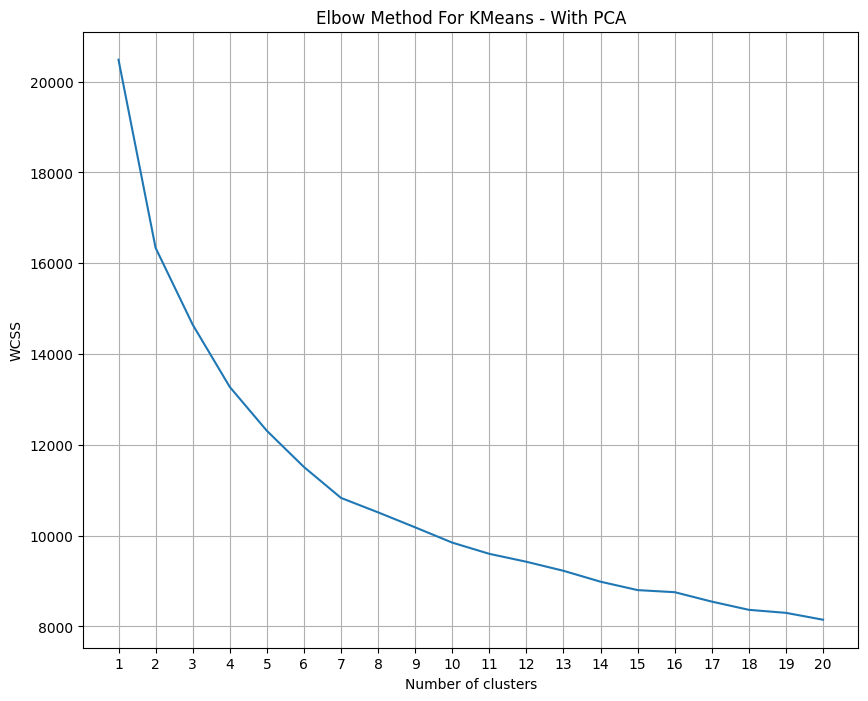

In [32]:
wcss = []
range_n_clusters = list(range(1, 21))
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(principal_components)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method For KMeans - With PCA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

Using Principal Components (principal_components) to generate the silhouette score, we can see the score is slightly higher by 0.2 with much more of a drop off to 8 clusters, unlike the first K-Means iteration where 7 and 8 are relatively equal.

In [33]:
range_n_clusters = list(range(2, 21))
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(principal_components)
    silhouette_avg = silhouette_score(principal_components, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Silhouette Scores For KMeans - With PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [34]:
n_clusters = 7
kmeans_optimal = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_optimal.fit(principal_components)

cluster_labels = kmeans_optimal.labels_
combined_df['Cluster_Labels'] = cluster_labels

kmeans_withPCA_df = combined_df
withPCA_clustercounts = kmeans_withPCA_df['Cluster_Labels'].value_counts()
print("Cluster results:")
print(withPCA_clustercounts)
kmeans_withPCA_df

Cluster results:
Cluster_Labels
1    84
6    81
3    54
4    36
2    35
0    21
5    16
Name: count, dtype: int64


Player    Pos   Age  1/3_per_90  Att 3rd_per_90  \
0    Abbey-Leigh Stringer  MF,FW  26.0        2.94            6.43   
1              Abbi Grant     FW  25.0        1.17           17.50   
2             Abbie Cowie     DF   0.0        0.61            4.64   
3           Abbie McManus  DF,MF  28.0        2.80            6.04   
4         Abby Dahlkemper     DF  27.0        9.07            1.26   
..                    ...    ...   ...         ...             ...   
429      Vivianne Miedema  FW,MF  25.0        1.86           26.87   
430          Vyan Sampson  DF,MF  22.0        2.82            1.50   
432          Yana Daniels  MF,FW  28.0        1.47           10.80   
433          Yui Hasegawa  MF,FW  24.0        4.38           14.31   
434           Zaneta Wyne  DF,MF  31.0        2.28            9.57   

     Att 3rd_plyr_per_90  Att Pen_per_90  Att_T/O_per_90  Att_drb_per_90  \
0                   0.28            0.39            0.52            1.78   
1                   0.55            3.36            1.17            1.48   
2                   0.00            0.00            0.00            1.61   
3                   0.07            0.84            0.42            0.51   
4                   0.00            0.28            0.00            0.28   
..                   ...             ...             ...             ...   
429                 0.33            8.39            2.03            0.63   
430                 0.00            0.00            0.19            0.38   
432                 0.15            1.47            2.07            1.70   
433                 0.25            0.99            1.17            0.62   
434                 0.16            0.94            1.02            1.18   

     Att_long_per_90  ...  Won_per_90  Link_Up_Play  Dead_Ball_Play  \
0               7.02  ...        1.81      0.335974        0.010969   
1               2.11  ...        0.39      0.182538        0.057282   
2               3.23  ...        0.20      0.041393        0.319927   
3               9.82  ...        1.05      0.449099        0.194394   
4              13.53  ...        1.12      0.879648        0.008531   
..               ...  ...         ...           ...             ...   
429             3.34  ...        0.75      0.203409        0.015235   
430             3.19  ...        1.13      0.316341        0.000000   
432             4.57  ...        2.42      0.146209        0.118221   
433             6.97  ...        0.06      0.309577        0.101767   
434             5.18  ...        0.78      0.242251        0.205363   

     Physical_Progression  Penalty_Area_Threat  Technical_Progression  \
0                0.337731             0.136545               0.209657   
1                0.425368             0.432902               0.063603   
2                0.045797             0.168978               0.159274   
3                0.393894             0.215981               0.453519   
4                0.936864             0.081551               0.937485   
..                    ...                  ...                    ...   
429              0.463626             0.848649               0.105898   
430              0.301545             0.106228               0.281620   
432              0.343950             0.258049               0.110499   
433              0.382586             0.342891               0.263876   
434              0.297776             0.279671               0.220791   

     Defensive_Actions  Pressing  Aerial_Threat  Cluster_Labels  
0             0.349581  0.686932       0.754527               1  
1             0.107612  0.411600       0.420523               6  
2             0.305745  0.377358       0.561368               3  
3             0.652635  0.593291       0.607646               3  
4             0.841114  0.362683       0.674044               0  
..                 ...       ...            ...             ...  
429           0.041462  0.185185       0.523139               2  
430    

As we did with TSNE previously, we will plot a 3D graph to visualise the cluster seperation. As we can see, there is a much clearer seperation in clusters when PCA is applied. This is due to the decrease of features from 70 to 24, allowing the most important features to determine how clusters are formed.

The downside to this is we may miss out on sublte features that can define specific players. Therefore, more testing can be done with higher principal components to judge whether this is true.

In [35]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2],
                     c=cluster_labels, cmap='seismic', s=50)

ax.set_title('3D Visualization of Clusters using the First Three Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter, ax=ax, label='Cluster Label')
plt.show()

Once again we find out which cluster Miedema is in.

In [36]:
player_name = "Vivianne Miedema"
player_cluster = kmeans_withPCA_df[kmeans_withPCA_df['Player'] == player_name]['Cluster_Labels']

if len(player_cluster) == 0:
    print(f"No data found for player: {player_name}")
else:
    print(f"Cluster for {player_name}: {player_cluster.iloc[0]}")

Cluster for Vivianne Miedema: 2


Validate results by comparing players under 24 in same cluster as Miedema using Radar Chart

Players in the same cluster as Vivianne Miedema and under the age of 24:
Alessia Russo
Chloe Kelly
Ebony Salmon
Ella Toone
Georgia Stanway
Jessica Naz
Kirsty Hanson
Lauren Hemp
Lauren James
Niamh Charles
Nicoline Sørensen
Rinsola Babajide


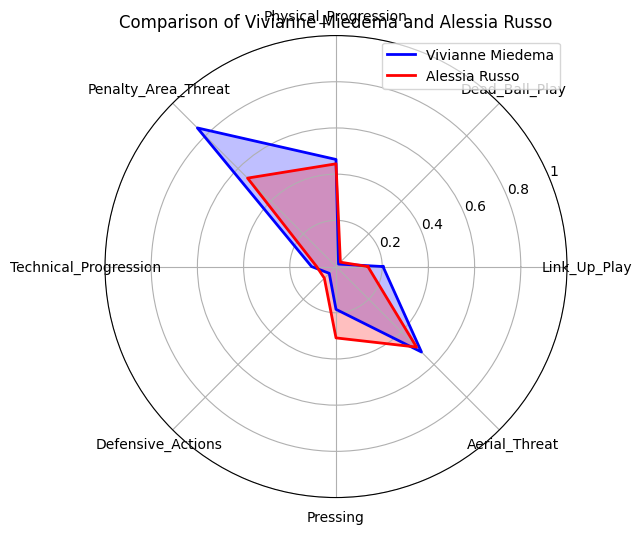

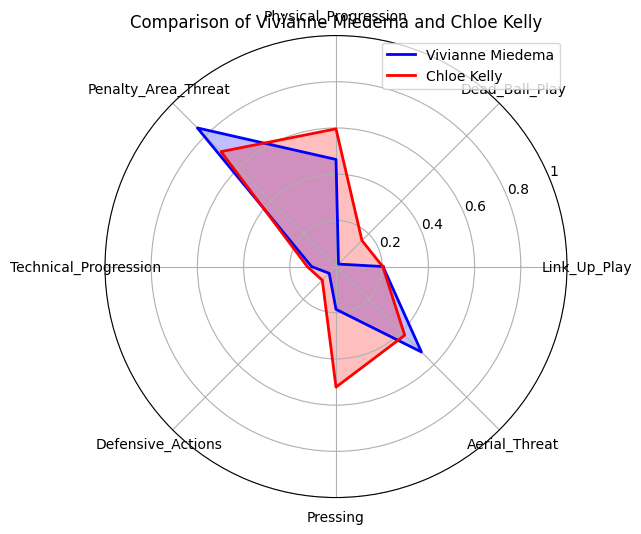

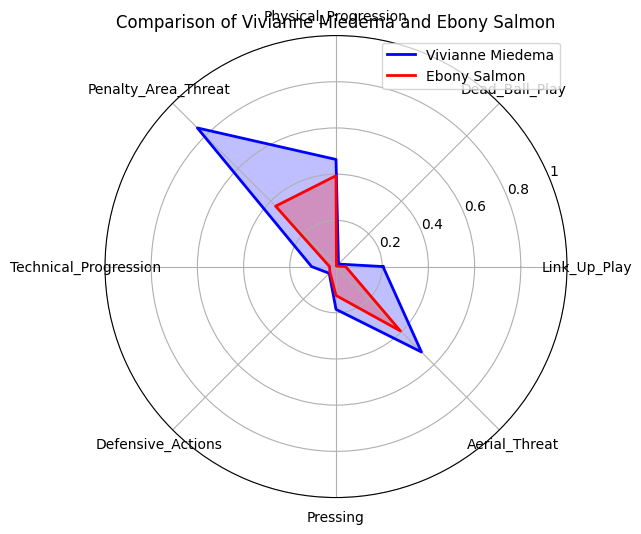

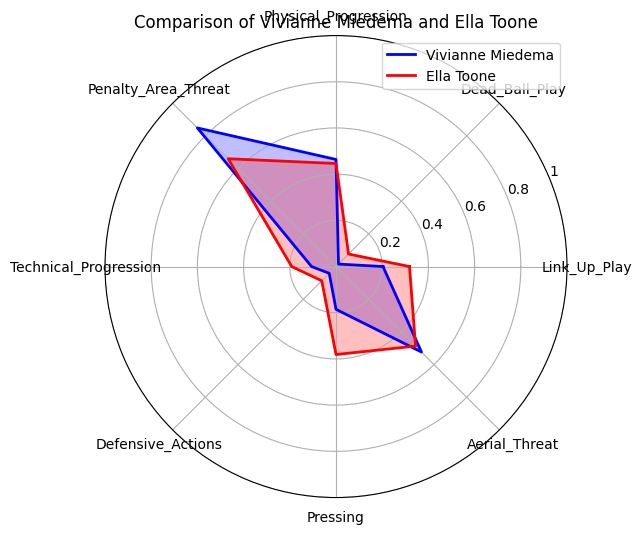

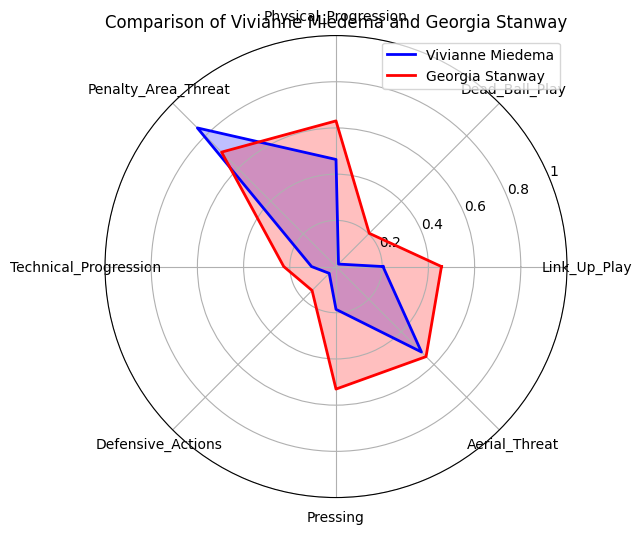

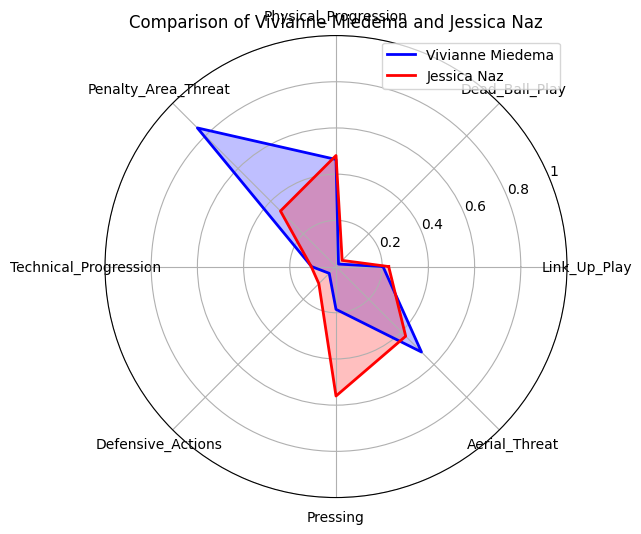

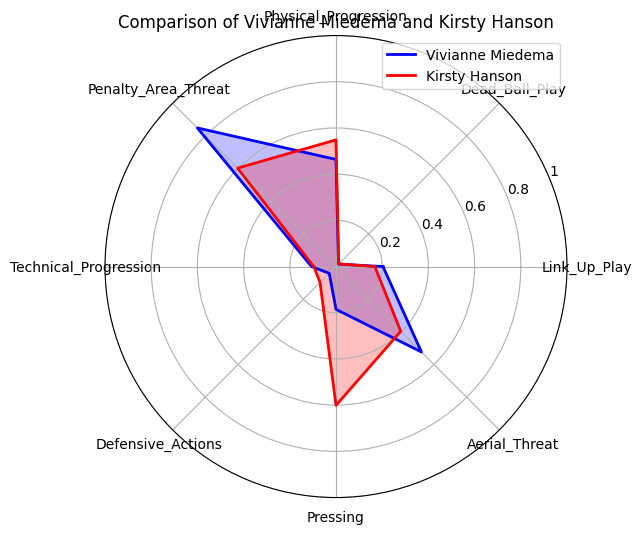

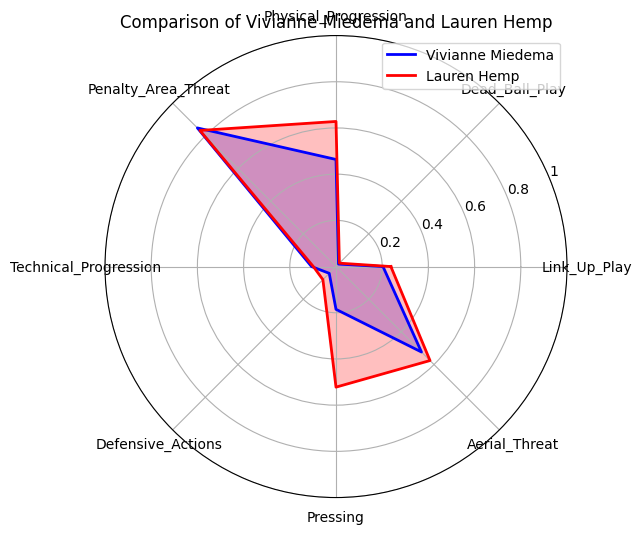

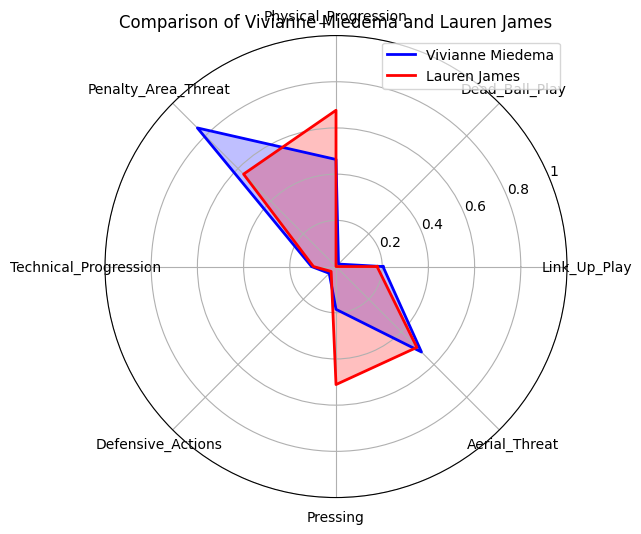

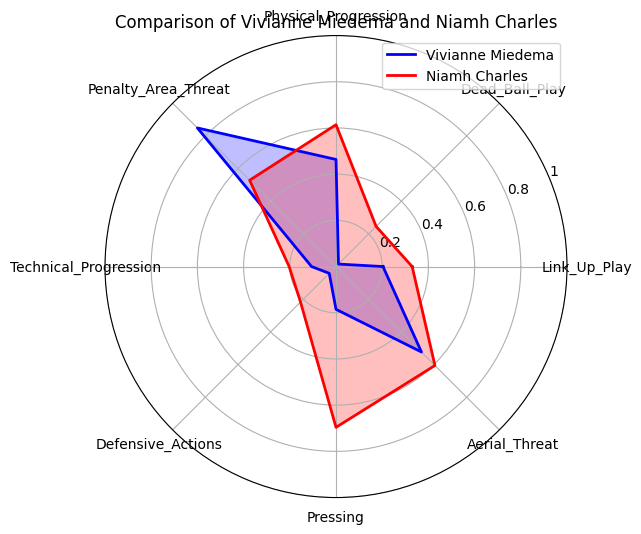

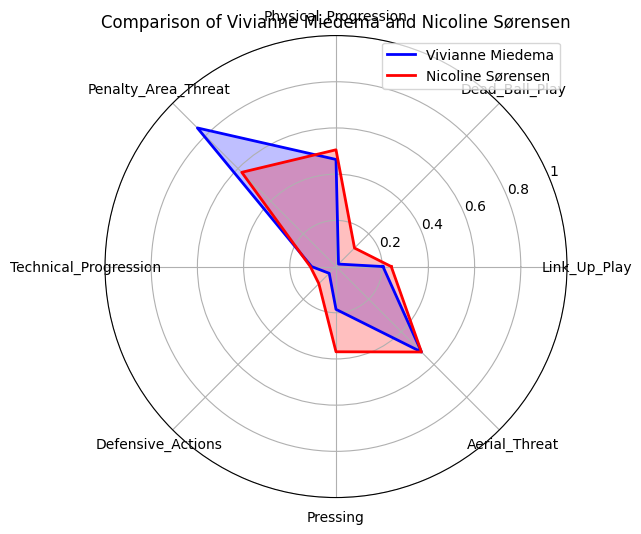

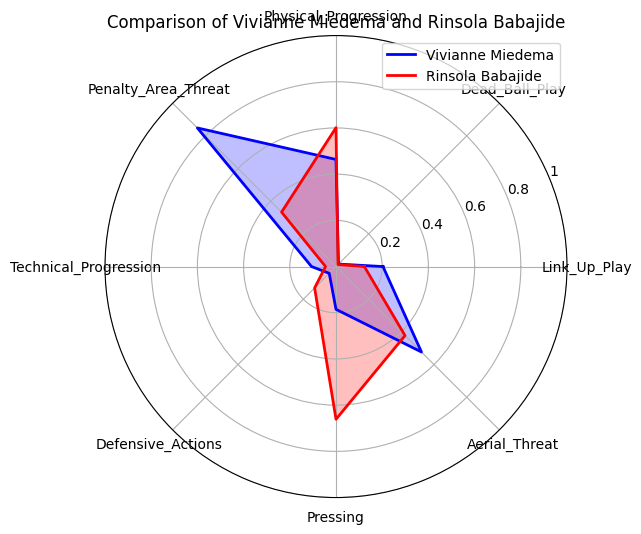

In [37]:
player_cluster = kmeans_withPCA_df[kmeans_withPCA_df['Player'] == player_name]['Cluster_Labels'].iloc[0]
PCA_similarplayers = kmeans_withPCA_df[(kmeans_withPCA_df['Cluster_Labels'] == player_cluster) & (kmeans_withPCA_df['Age'] < age_limit)]

print(f"Players in the same cluster as {player_name} and under the age of {age_limit}:")
for player in PCA_similarplayers['Player']:
    print(player)

for other_player in PCA_similarplayers['Player']:
    if other_player != player_name:
        compare_players_radarChart(player_name, other_player, kmeans_withPCA_df)

We have created a table to visualise the differences in amounts of players per cluster between to two KMeans models. We can see that cluster 0 has identical numbers, whereas cluster 2, 3 and 4 are halved, cluster 6 is more than halved, and cluster 1 and 5 have similar numbers. This indicates a great difference in clustering when using PCA.

In [38]:
combined_index = withPCA_clustercounts.index.union(noPCA_clustercount.index)
withPCA_clustercounts = withPCA_clustercounts.reindex(combined_index, fill_value=0)  # if there is not the same amount of clusters, we fill missing values with 0
noPCA_clustercount = noPCA_clustercount.reindex(combined_index, fill_value=0)  # as above

comparison_df = pd.DataFrame({
    'Cluster Label': combined_index,
    'KMeans Clusters (no PCA)': noPCA_clustercount.values,
    'KMeans Clusters (with PCA)': withPCA_clustercounts.values
})

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
tbl = table(ax, comparison_df, loc='center', cellLoc='center', colWidths=[0.6]*len(comparison_df.columns))
tbl.set_fontsize(11)
plt.title('KMeans Cluster Result Comparison Table')
plt.show()

**Hierarchical Clustering**

For Hierarchical Clustering, we jump straight into creating a dendrogram in order to visualise clusters based on our set parameters. We have included the player names from the dataset as we want them listed along the X Axis in order to determine which players are close to each other.

We used code from https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html to help create this dendrogram.

We then use ward method to create a dendrogram. With this, we set a threshold distance to aid in our visual selection of the number of clusters, which in this case is 7.

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

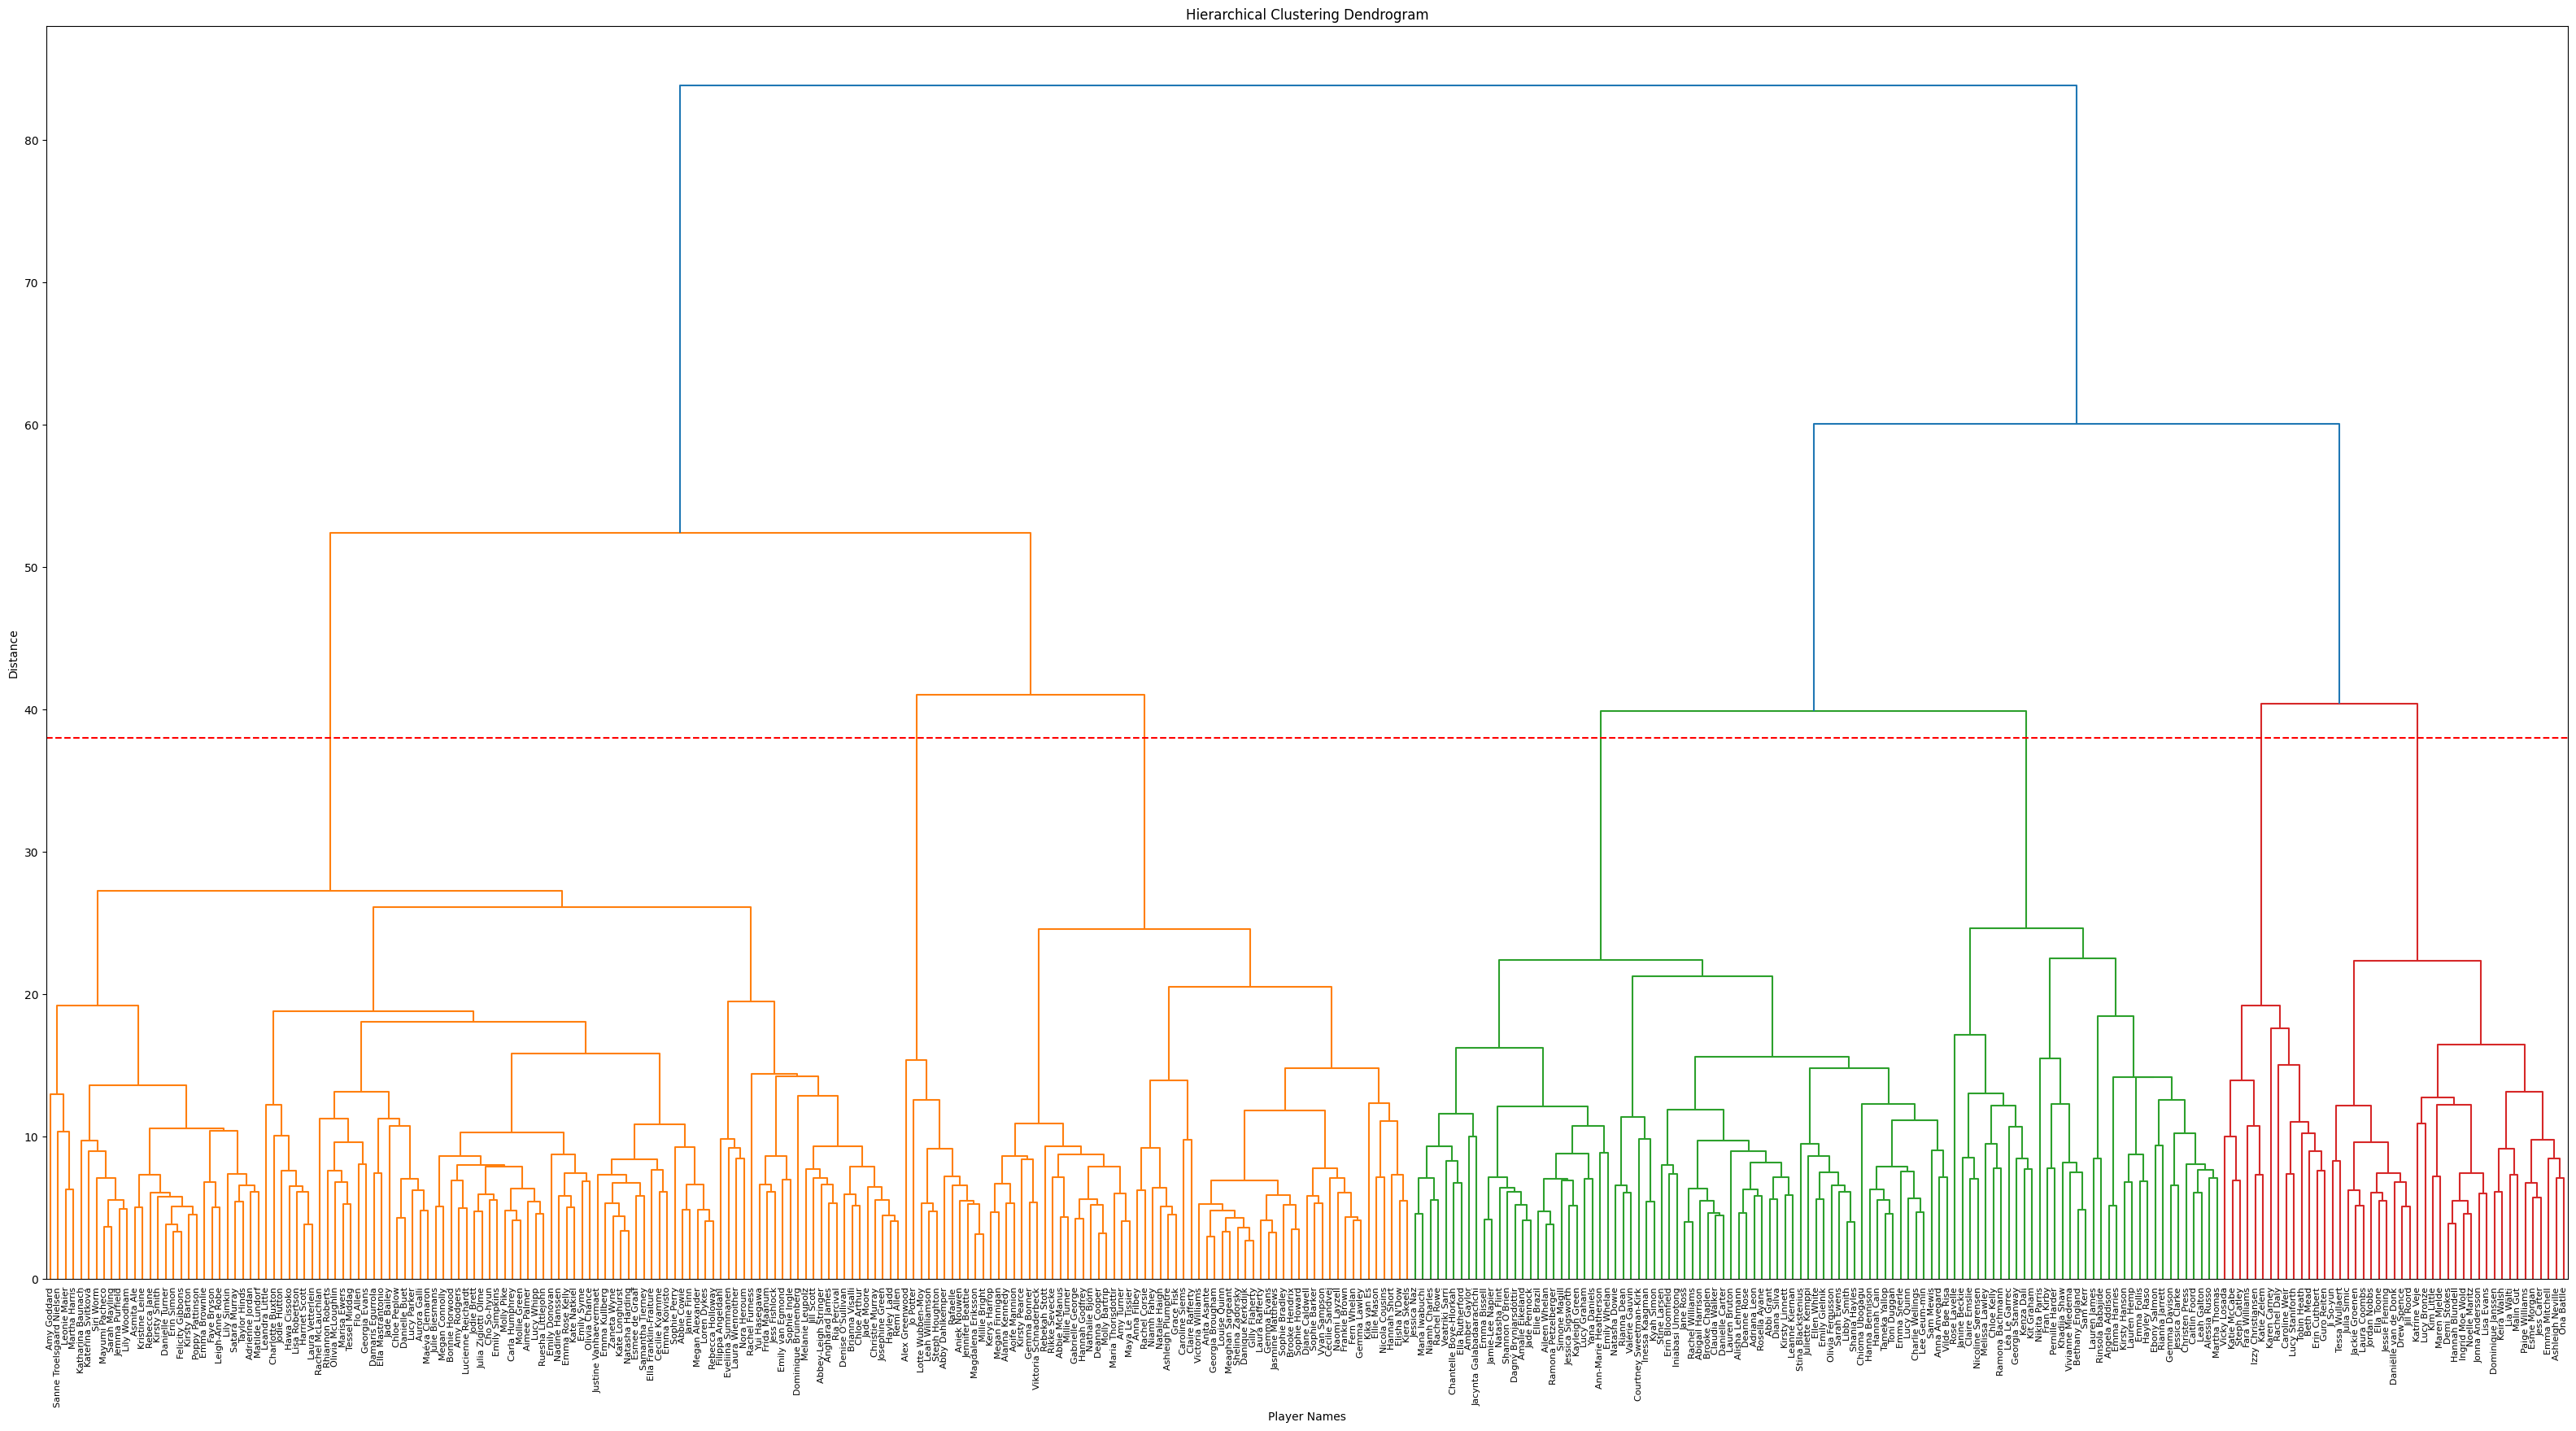

Number of clusters formed at a threshold distance of 38: 7


In [40]:
player_names = combined_df['Player'].values

Z = linkage(scaled_features, method='ward') # here we use ward method due to its advantages in creating more compact clusters from datasets with high dimensionality, such as ours
threshold_distance = 38  # We choose 38 as it is roughly half of the max distance value, whilst also allowing for a clear seperation of more than just 4 clusters

plt.figure(figsize=(40, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Player Names')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels=player_names,
)

plt.axhline(y=threshold_distance, color='r', linestyle='--')
plt.show()

clusters = np.sum(Z[:, 2] > threshold_distance) + 1
print(f"Number of clusters formed at a threshold distance of {threshold_distance}: {clusters}") # we print the amount of clusters below our set threshold of 38 to confirm our visual selection of number of clusters

Although the silhouette score is less of an important validation method, we will still use one to compare to the KMeans results using Agglomerative Clustering, which, like how the dendrogram visualises, groups clusters based on their similarities using the ward method. The results of this silhouette score show that 6 and 7 clusters have the highest scores beyond the too-small amount of 3.

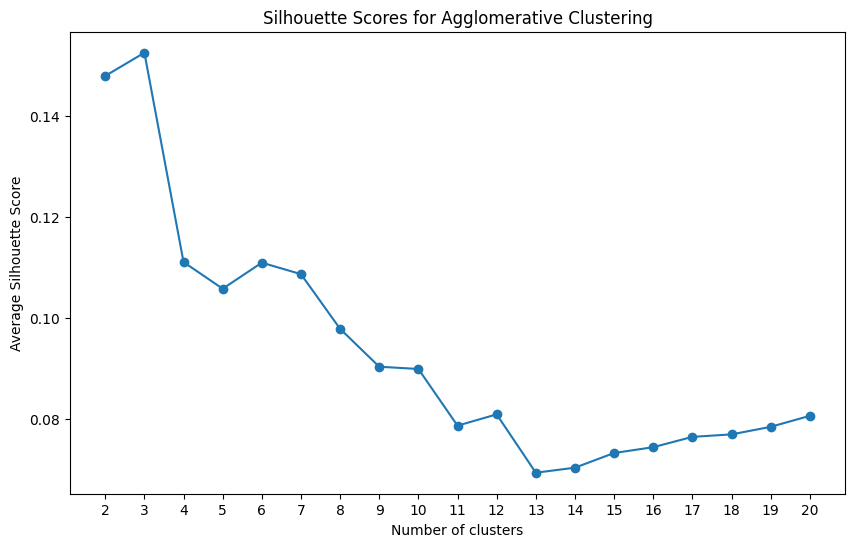

In [41]:
range_n_clusters = list(range(2, 21))
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.xticks(range_n_clusters)
plt.show()

Next we perform the clustering based on the dendrogram and silhouette score results, which in this case will be 7 number of clusters. We use Euclidean metic and Ward method, both of which can be changed in order for testing of this model.

In [42]:
n_clusters = 7
cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(scaled_features)

combined_df['Cluster_Labels'] = cluster_labels
hierachical_df = combined_df

hierarchical_clustercounts = hierachical_df['Cluster_Labels'].value_counts()
print("Cluster results:")
print(hierarchical_clustercounts)
hierachical_df

Cluster results:
Cluster_Labels
0    111
2     70
3     55
1     35
6     31
5     14
4     11
Name: count, dtype: int64


Player    Pos   Age  1/3_per_90  Att 3rd_per_90  \
0    Abbey-Leigh Stringer  MF,FW  26.0        2.94            6.43   
1              Abbi Grant     FW  25.0        1.17           17.50   
2             Abbie Cowie     DF   0.0        0.61            4.64   
3           Abbie McManus  DF,MF  28.0        2.80            6.04   
4         Abby Dahlkemper     DF  27.0        9.07            1.26   
..                    ...    ...   ...         ...             ...   
429      Vivianne Miedema  FW,MF  25.0        1.86           26.87   
430          Vyan Sampson  DF,MF  22.0        2.82            1.50   
432          Yana Daniels  MF,FW  28.0        1.47           10.80   
433          Yui Hasegawa  MF,FW  24.0        4.38           14.31   
434           Zaneta Wyne  DF,MF  31.0        2.28            9.57   

     Att 3rd_plyr_per_90  Att Pen_per_90  Att_T/O_per_90  Att_drb_per_90  \
0                   0.28            0.39            0.52            1.78   
1                   0.55            3.36            1.17            1.48   
2                   0.00            0.00            0.00            1.61   
3                   0.07            0.84            0.42            0.51   
4                   0.00            0.28            0.00            0.28   
..                   ...             ...             ...             ...   
429                 0.33            8.39            2.03            0.63   
430                 0.00            0.00            0.19            0.38   
432                 0.15            1.47            2.07            1.70   
433                 0.25            0.99            1.17            0.62   
434                 0.16            0.94            1.02            1.18   

     Att_long_per_90  ...  Won_per_90  Link_Up_Play  Dead_Ball_Play  \
0               7.02  ...        1.81      0.335974        0.010969   
1               2.11  ...        0.39      0.182538        0.057282   
2               3.23  ...        0.20      0.041393        0.319927   
3               9.82  ...        1.05      0.449099        0.194394   
4              13.53  ...        1.12      0.879648        0.008531   
..               ...  ...         ...           ...             ...   
429             3.34  ...        0.75      0.203409        0.015235   
430             3.19  ...        1.13      0.316341        0.000000   
432             4.57  ...        2.42      0.146209        0.118221   
433             6.97  ...        0.06      0.309577        0.101767   
434             5.18  ...        0.78      0.242251        0.205363   

     Physical_Progression  Penalty_Area_Threat  Technical_Progression  \
0                0.337731             0.136545               0.209657   
1                0.425368             0.432902               0.063603   
2                0.045797             0.168978               0.159274   
3                0.393894             0.215981               0.453519   
4                0.936864             0.081551               0.937485   
..                    ...                  ...                    ...   
429              0.463626             0.848649               0.105898   
430              0.301545             0.106228               0.281620   
432              0.343950             0.258049               0.110499   
433              0.382586             0.342891               0.263876   
434              0.297776             0.279671               0.220791   

     Defensive_Actions  Pressing  Aerial_Threat  Cluster_Labels  
0             0.349581  0.686932       0.754527               0  
1             0.107612  0.411600       0.420523               2  
2             0.305745  0.377358       0.561368               0  
3             0.652635  0.593291       0.607646               3  
4             0.841114  0.362683       0.674044               4  
..                 ...       ...            ...             ...  
429           0.041462  0.185185       0.523139               1  
430    

We check which cluster Miedema is in.

In [43]:
player_name = "Vivianne Miedema"
player_cluster = hierachical_df[hierachical_df['Player'] == player_name]['Cluster_Labels']

if len(player_cluster) == 0:
    print(f"No data found for player: {player_name}")
else:
    print(f"Cluster for {player_name}: {player_cluster.iloc[0]}")

Cluster for Vivianne Miedema: 1


Here we compare Miedema with those in her cluster under 24.

Players in the same cluster as Vivianne Miedema and under the age of 24:
Alessia Russo
Angela Addison
Chloe Kelly
Ebony Salmon
Emma Harries
Georgia Stanway
Kirsty Hanson
Lauren Hemp
Lauren James
Nicoline Sørensen
Rianna Jarrett
Rinsola Babajide


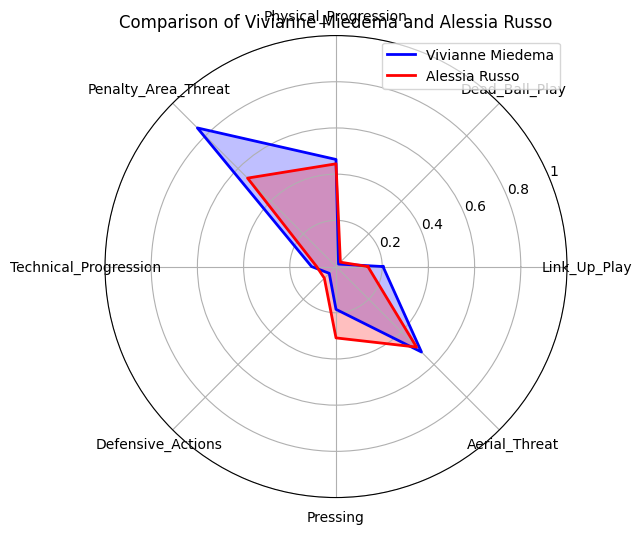

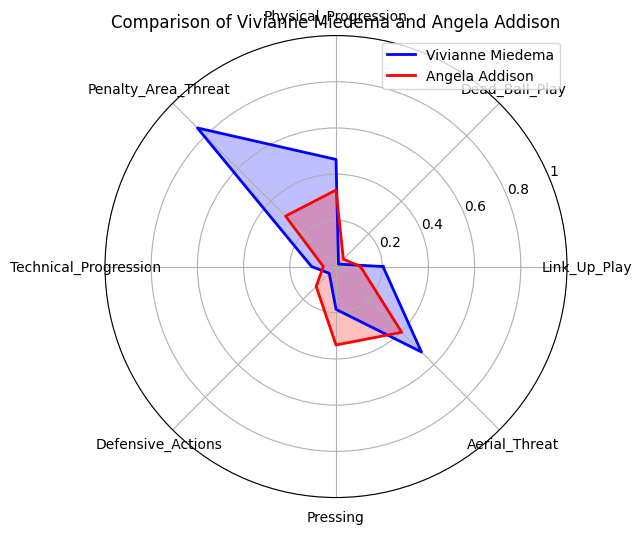

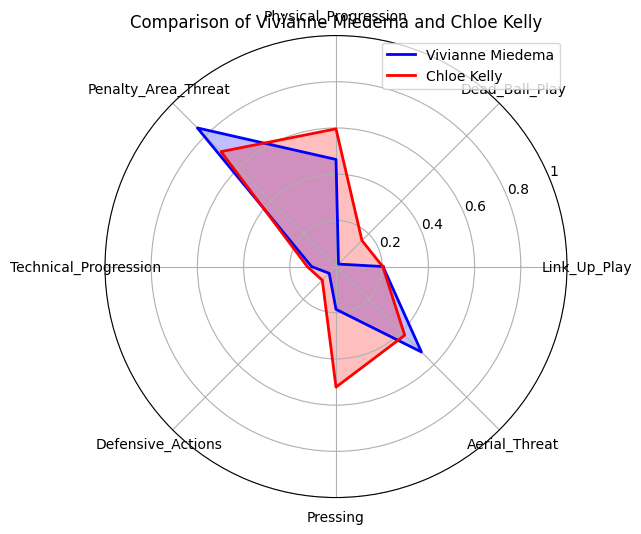

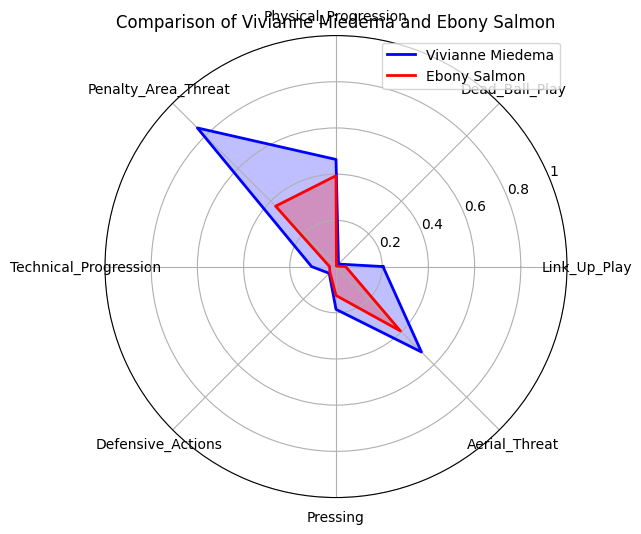

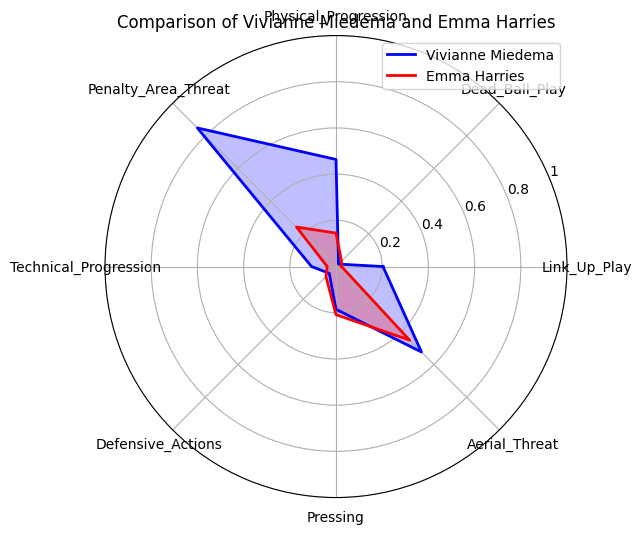

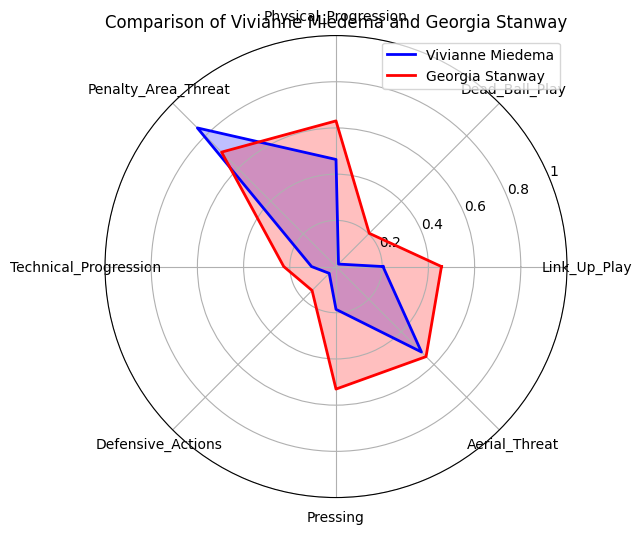

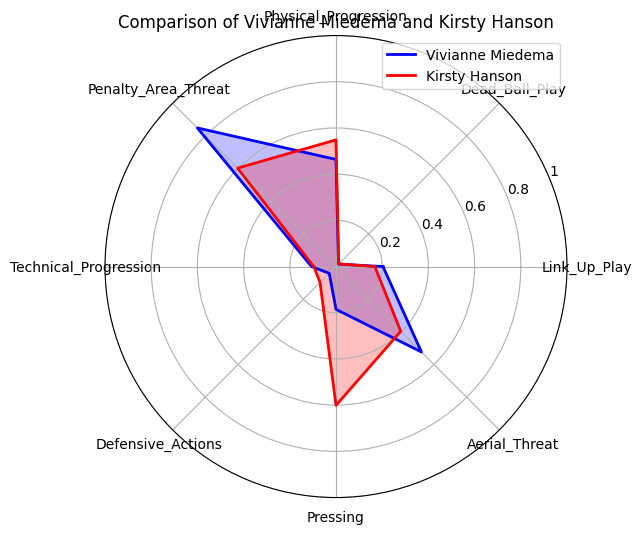

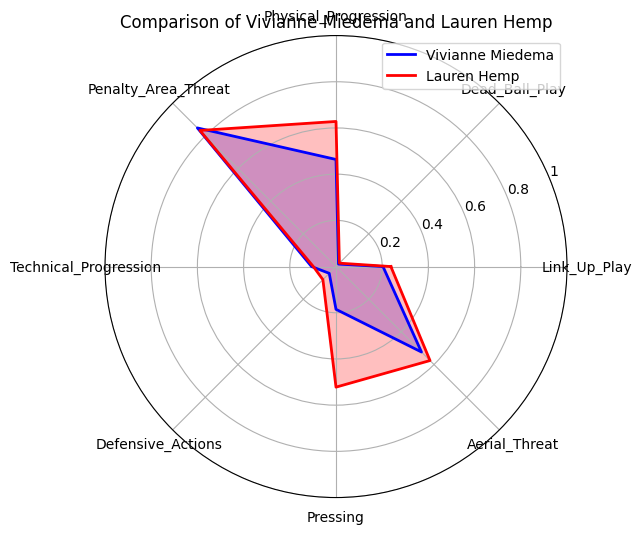

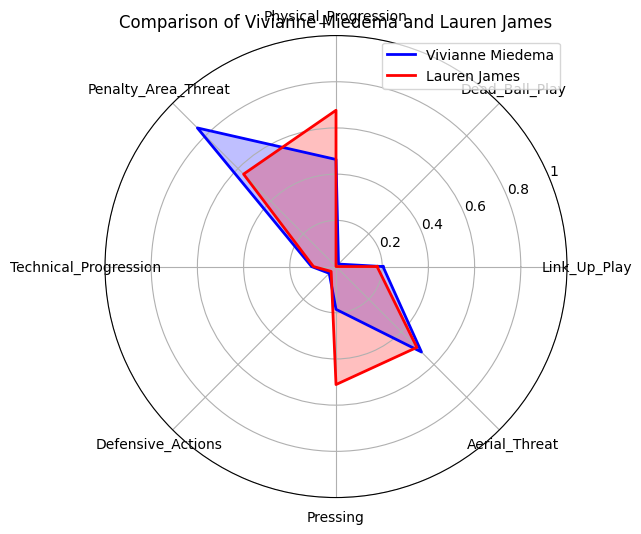

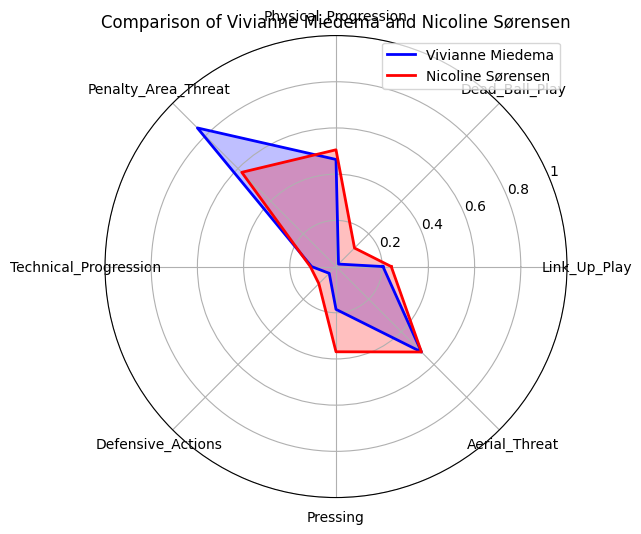

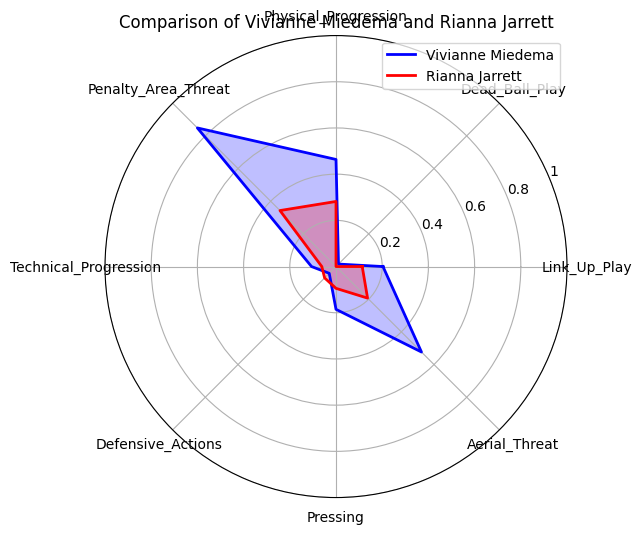

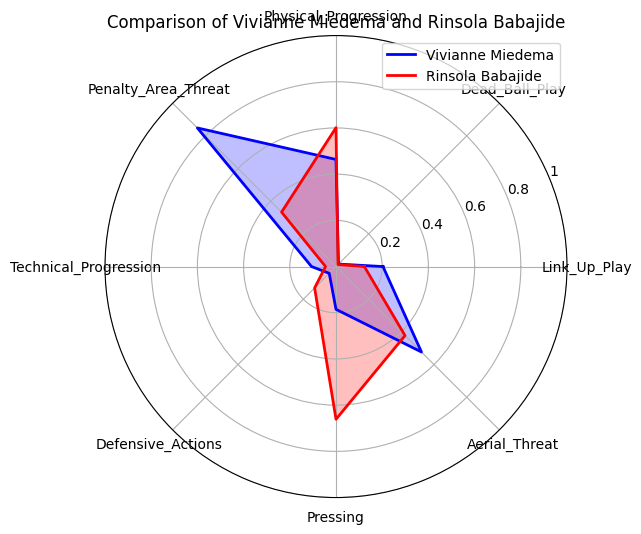

In [44]:
player_cluster = hierachical_df[hierachical_df['Player'] == player_name]['Cluster_Labels'].iloc[0]
hierarchical_similarplayers = hierachical_df[(hierachical_df['Cluster_Labels'] == player_cluster) & (hierachical_df['Age'] < age_limit)]

print(f"Players in the same cluster as {player_name} and under the age of {age_limit}:")
for player in hierarchical_similarplayers['Player']:
    print(player)

for other_player in hierarchical_similarplayers['Player']:
    if other_player != player_name:
        compare_players_radarChart(player_name, other_player, hierachical_df)

In [45]:
print(withPCA_clustercounts)
print(noPCA_clustercount)
print(hierarchical_clustercounts)


Cluster_Labels
0    21
1    84
2    35
3    54
4    36
5    16
6    81
Name: count, dtype: int64
Cluster_Labels
0    78
1    82
2    22
3    35
4    17
5    58
6    35
Name: count, dtype: int64
Cluster_Labels
0    111
2     70
3     55
1     35
6     31
5     14
4     11
Name: count, dtype: int64


Now we create a new table to visualise the number of players in each cluster thus far.

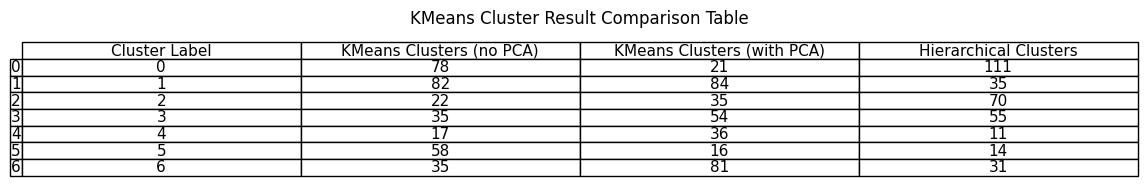

In [46]:
temp_combined_index = withPCA_clustercounts.index.union(noPCA_clustercount.index) # required to created a temp combined index as .union is for 2 elements
combined_index = temp_combined_index.union(hierarchical_clustercounts.index)

withPCA_clustercounts = withPCA_clustercounts.reindex(combined_index, fill_value=0)
noPCA_clustercount = noPCA_clustercount.reindex(combined_index, fill_value=0)
hierarchical_clustercounts = hierarchical_clustercounts.reindex(combined_index, fill_value=0)

comparison_df = pd.DataFrame({
    'Cluster Label': combined_index,
    'KMeans Clusters (no PCA)': noPCA_clustercount.values,
    'KMeans Clusters (with PCA)': withPCA_clustercounts.values,
    'Hierarchical Clusters': hierarchical_clustercounts.values
})

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
tbl = table(ax, comparison_df, loc='center', cellLoc='center', colWidths=[0.6]*len(comparison_df.columns))
tbl.set_fontsize(11)
plt.title('KMeans Cluster Result Comparison Table')
plt.show()

**Nearest Neighbours**

The final model to test is Nearest Neighbours. We will re-scale our dataset for readability. The process takes little code to implement. Testing revealed that the the 7th neighbour of Miedema has a pairwise score of 10.21 for Deanne Rose which, when not inherently bad at all, it passes into double digits unlike the first 6, therefore 6 is chosen to represent the final amount of neighbours for this test.

In [47]:
features_nn = featuresForClustering.columns.tolist()
features_nn_df = combined_df[features_nn]

scaler = StandardScaler()
scaled_features_nn = scaler.fit_transform(features_nn_df)

In [48]:
from sklearn.neighbors import NearestNeighbors

Using domain knowledge shows that these results are accurate to real life metrics, as the closest players are mostly forwards whilst the furthest players mostly not forwards.

In [49]:
miedema_scaled = scaler.transform(combined_df[combined_df['Player'] == 'Vivianne Miedema'][features_nn]) # preparing and scaling just Miedema's features so we can find her nearest neighbours

n_neighbours = 7
nn = NearestNeighbors(n_neighbors=n_neighbours)
nn.fit(scaled_features_nn)

distances, indices = nn.kneighbors(miedema_scaled, n_neighbors=len(combined_df))

neighbors_df = pd.DataFrame({
    'Player': combined_df.iloc[indices[0]]['Player'].values, # uses these indices to select the corresponding rows from the combined_df DataFrame.
    'Distance': distances[0] # corresponds to another column in the DataFrame, an array of distances between the miedema and each of the nearest neighbors.
})

furthest_sorted_neighbors_df = neighbors_df.sort_values(by='Distance', ascending=False)
closest_sorted_neighbors_df = neighbors_df.sort_values(by='Distance', ascending=True)


furthest_players = furthest_sorted_neighbors_df.head(7)
furthest_players = furthest_players[furthest_players['Player'] != 'Vivianne Miedema']

closest_players = closest_sorted_neighbors_df.head(7)
closest_players = closest_players[closest_players['Player'] != 'Vivianne Miedema']

print("The six closest players from Vivianne Miedema are:")
print(closest_players)

print("The six furthest players from Vivianne Miedema are:")
print(furthest_players)

The six closest players from Vivianne Miedema are:
            Player  Distance
1    Caitlin Foord  6.527702
2  Bethany England  6.896897
3         Sam Kerr  6.954300
4     Khadija Shaw  7.518934
5       Fran Kirby  7.572512
6  Pernille Harder  7.705831
The six furthest players from Vivianne Miedema are:
               Player   Distance
326    Alex Greenwood  21.546578
325      Karen Carney  20.498876
324       Amy Goddard  19.679160
323         Jo Potter  19.595234
322   Abby Dahlkemper  19.370812
321   Leah Williamson  19.243076
320  Lotte Wubben-Moy  19.118797


Creating this heatmap was fairly complicated, as it uses Miedema as the focal point to base off the nearest neighbours that are under 24. Code taken from answers to the following question was helpful: https://stackoverflow.com/questions/56153726/plot-k-nearest-neighbor-graph-with-8-features

The indices are the output from the nearest neighbours method. players_below_24_df.iloc[indices[0] takes the rows from players below 24 dataframe which correspond with these indices.

This combined_features = np.vstack((miedema_scaled, scaler.transform(players_below_24_df.iloc[indices[0]][features_nn]))) results in a variable containing the scaled features of miedema plus the scaled features of her nearest neighbours, meaning that the heatmap can use this array to visualise pairwise distance.

The result clearly shows the pairwise distances between the 6 closest players via pairwise distance to Miedema.

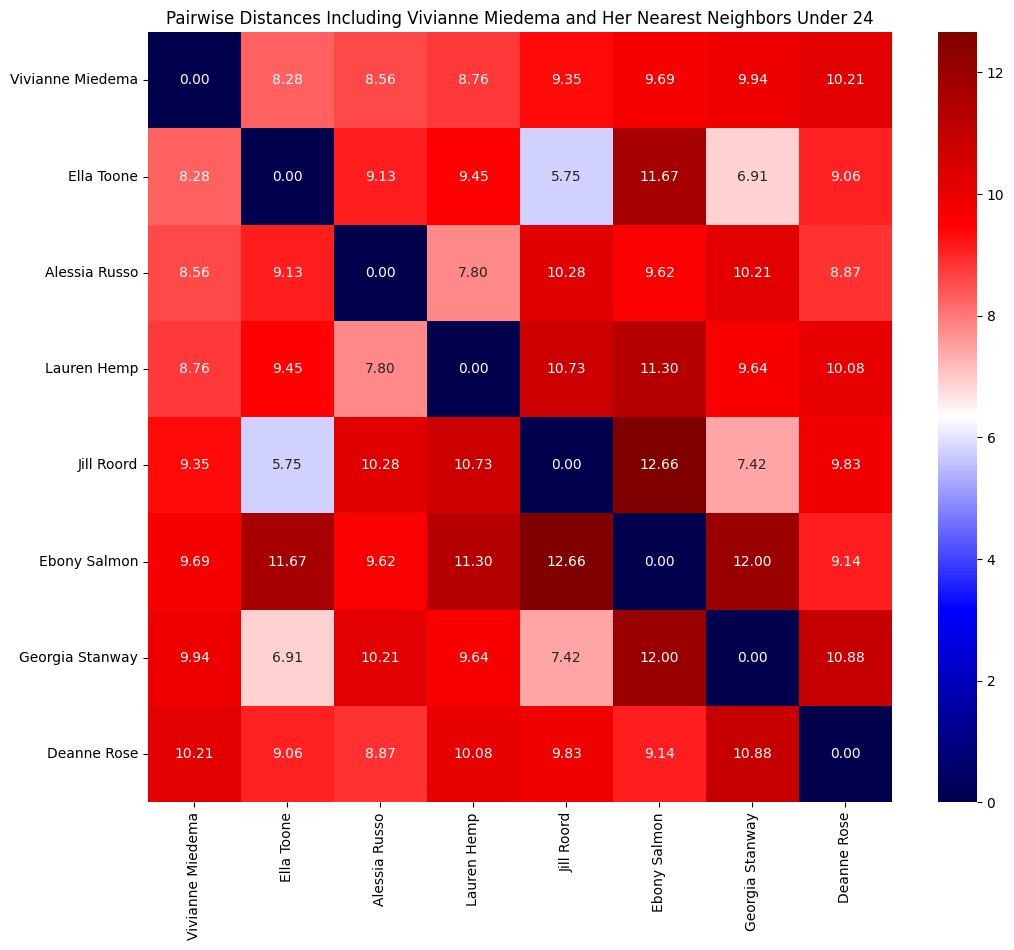

In [50]:
players_below_24_df = combined_df[combined_df['Age'] < 24]

nn.fit(scaler.transform(players_below_24_df[features_nn]))
distances, indices = nn.kneighbors(miedema_scaled, n_neighbors=n_neighbours)
combined_features = np.vstack((miedema_scaled, scaler.transform(players_below_24_df.iloc[indices[0]][features_nn])))
heatmap_data = np.zeros((combined_features.shape[0], combined_features.shape[0]))

for i in range(combined_features.shape[0]):
    for j in range(combined_features.shape[0]):
        heatmap_data[i][j] = np.linalg.norm(combined_features[i] - combined_features[j]) # np.linalg.norm calculates distance between the two feature vectors

nearest_neighbors_names = ['Vivianne Miedema'] + list(players_below_24_df.iloc[indices[0]]['Player'].values)

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', xticklabels=nearest_neighbors_names, yticklabels=nearest_neighbors_names, cmap='seismic')
plt.title('Pairwise Distances Including Vivianne Miedema and Her Nearest Neighbors Under 24')
plt.show()

Now we can compare these players using radar charts.

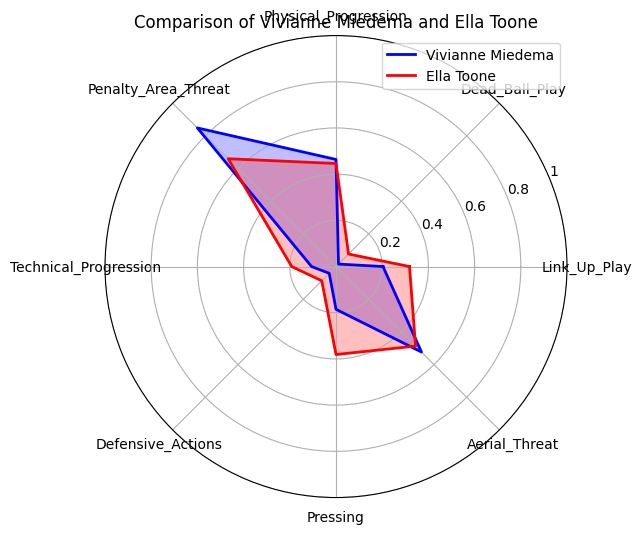

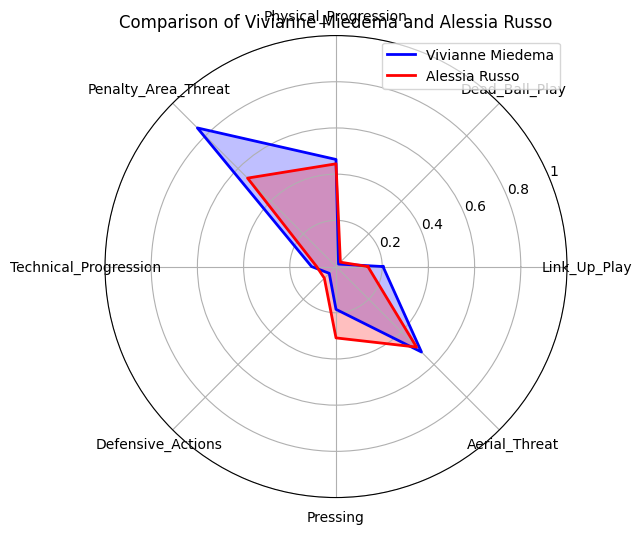

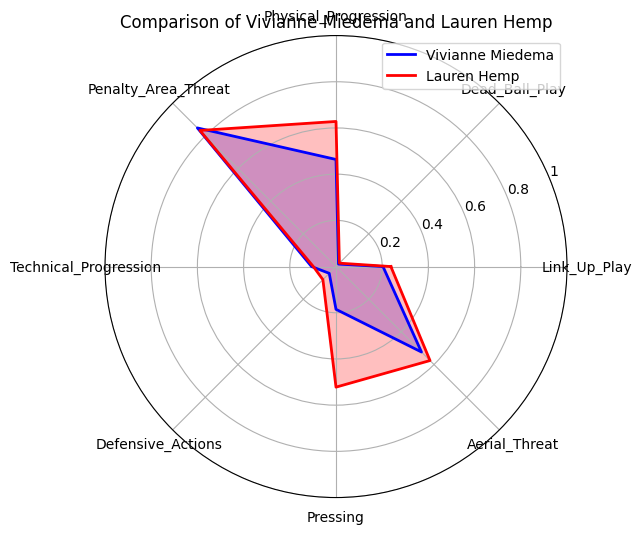

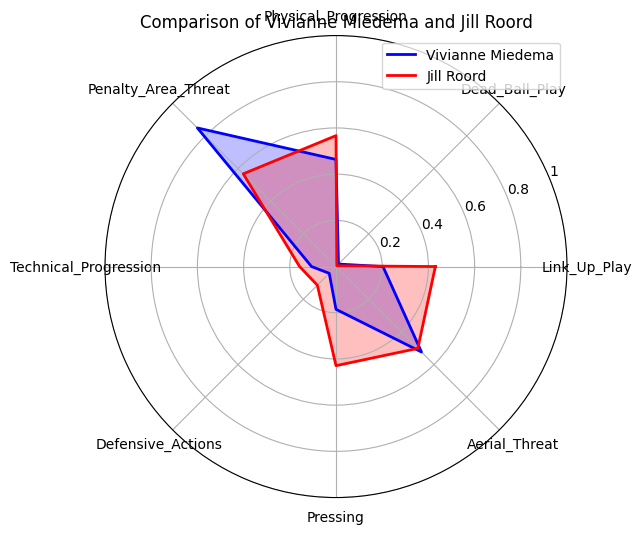

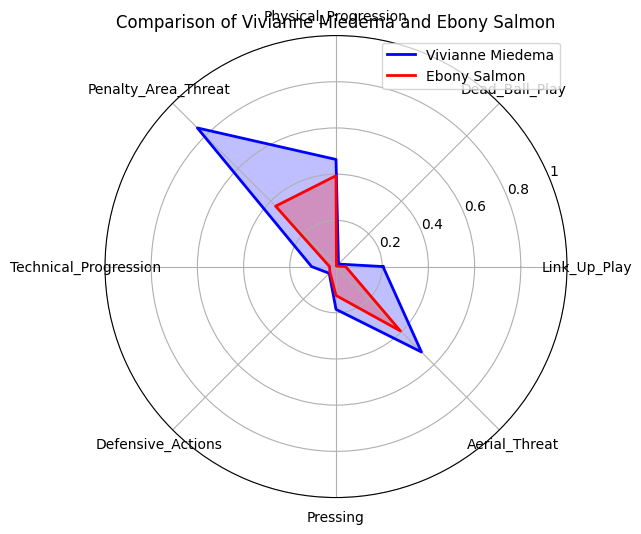

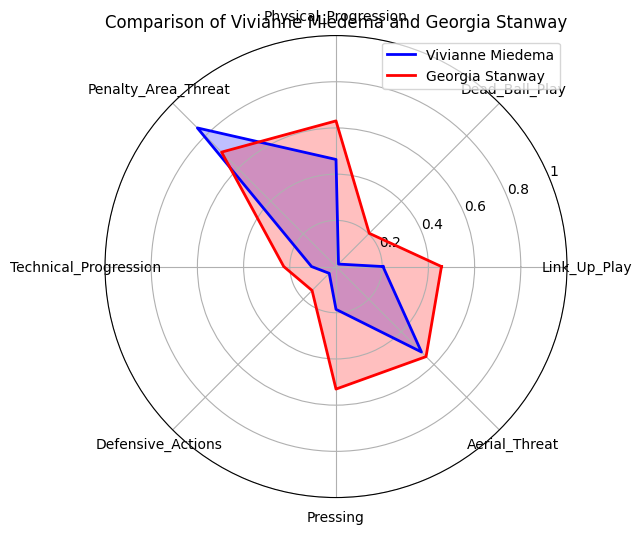

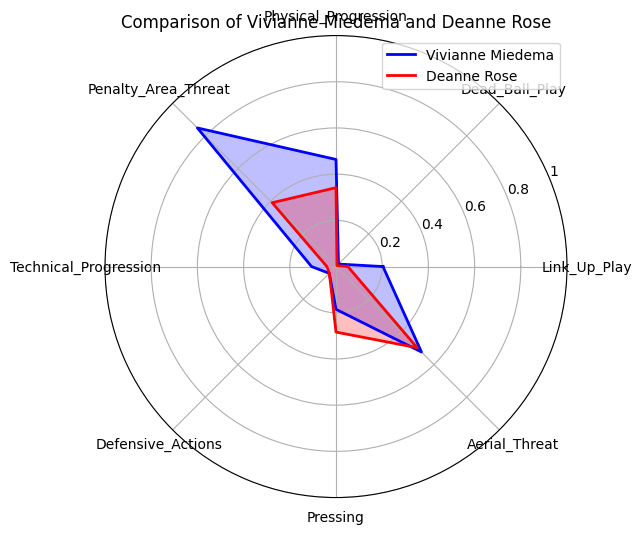

In [51]:
player_name = 'Vivianne Miedema'
for i in range(len(indices[0])):
    similar_player_index = indices[0][i]
    similar_player_name = players_below_24_df.iloc[similar_player_index]['Player']
    if similar_player_name != player_name:
        compare_players_radarChart(player_name, similar_player_name, combined_df)

We can list all the players from each model in a table for easy visualisation. This can be used to compare the results, see who reoccurs and who doesnt, and spot players like Jill Roord who only appear in one model's results.

     NoPCA Clustering     PCA Clustering Hierarchical Clustering  \
0       Alessia Russo      Alessia Russo           Alessia Russo   
1         Chloe Kelly        Chloe Kelly          Angela Addison   
2        Ebony Salmon       Ebony Salmon             Chloe Kelly   
3          Ella Toone         Ella Toone            Ebony Salmon   
4     Georgia Stanway    Georgia Stanway            Emma Harries   
5         Jessica Naz        Jessica Naz         Georgia Stanway   
6       Kirsty Hanson      Kirsty Hanson           Kirsty Hanson   
7         Lauren Hemp        Lauren Hemp             Lauren Hemp   
8        Lauren James       Lauren James            Lauren James   
9       Niamh Charles      Niamh Charles       Nicoline Sørensen   
10  Nicoline Sørensen  Nicoline Sørensen          Rianna Jarrett   
11   Rinsola Babajide   Rinsola Babajide        Rinsola Babajide   

   Nearest Neighbors  
0         Ella Toone  
1      Alessia Russo  
2        Lauren Hemp  
3         Jill Roord  


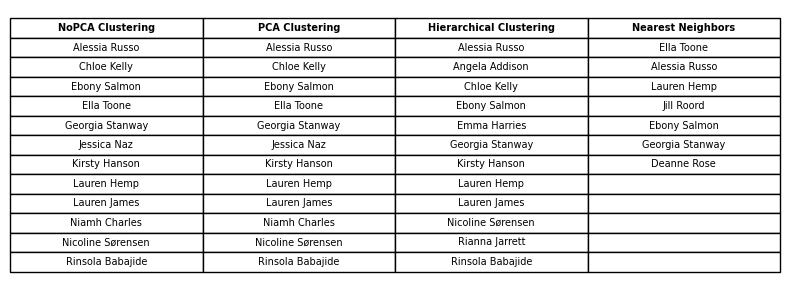

In [52]:
noPCA_playernames = noPCA_similarplayers['Player'].tolist()
PCA_playernames = PCA_similarplayers['Player'].tolist()
hierarchical_playernames = hierarchical_similarplayers['Player'].tolist()
nn_playernames = players_below_24_df.iloc[indices[0]]['Player'].tolist()

max_length = max(len(noPCA_playernames), len(PCA_playernames), len(hierarchical_playernames), len(nn_playernames)) # finding out the max length of each model's results

# below we are making it so any empty spaces are filled with none/empty
noPCA_playernames += [None] * (max_length - len(noPCA_playernames))
PCA_playernames += [None] * (max_length - len(PCA_playernames))
hierarchical_playernames += [None] * (max_length - len(hierarchical_playernames))
nn_playernames += [None] * (max_length - len(nn_playernames))

#creating a dataframe as well as the dictionary to name the columns
comparison_df = pd.DataFrame({
    'NoPCA Clustering': noPCA_playernames,
    'PCA Clustering': PCA_playernames,
    'Hierarchical Clustering': hierarchical_playernames,
    'Nearest Neighbors': nn_playernames
})

print(comparison_df)

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')
table_data = comparison_df.values.tolist()
table_data.insert(0, comparison_df.columns.tolist())  # Insert headers as the first row
table = ax.table(cellText=table_data, loc='center', cellLoc='center')
for (i, col) in enumerate(comparison_df.columns):
    table[0, i].get_text().set_weight('bold')
plt.tight_layout()
plt.show()

The next few code blocks are creating graphs to plot a visualisation of the players to their nearest neighbours using Multidimensional Scaling. This allows us to see the similarity and difference between individuals.

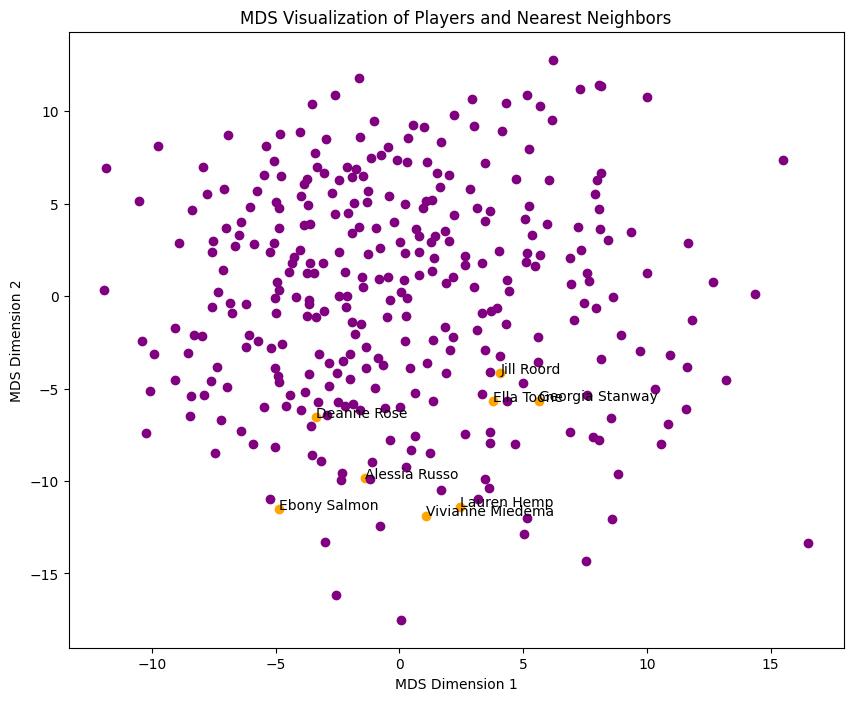

In [53]:
from sklearn.manifold import MDS

nearest_neighbors_names = players_below_24_df.iloc[indices[0]]['Player'].values
highlighted_players = [player_name] + list(nearest_neighbors_names)

mds = MDS(n_components=2, random_state=42, normalized_stress='auto')
mds_result = mds.fit_transform(scaled_features_nn)

plt.figure(figsize=(10, 8))

for i, player in enumerate(combined_df['Player']):
    if player in highlighted_players:
        plt.scatter(mds_result[i, 0], mds_result[i, 1], color='orange')
        plt.text(mds_result[i, 0], mds_result[i, 1], player)
    else:
        plt.scatter(mds_result[i, 0], mds_result[i, 1], color='purple')

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Visualization of Players and Nearest Neighbors')
plt.show()

This graph is created to allow the interactive graph to work, hence why there are no player labels.

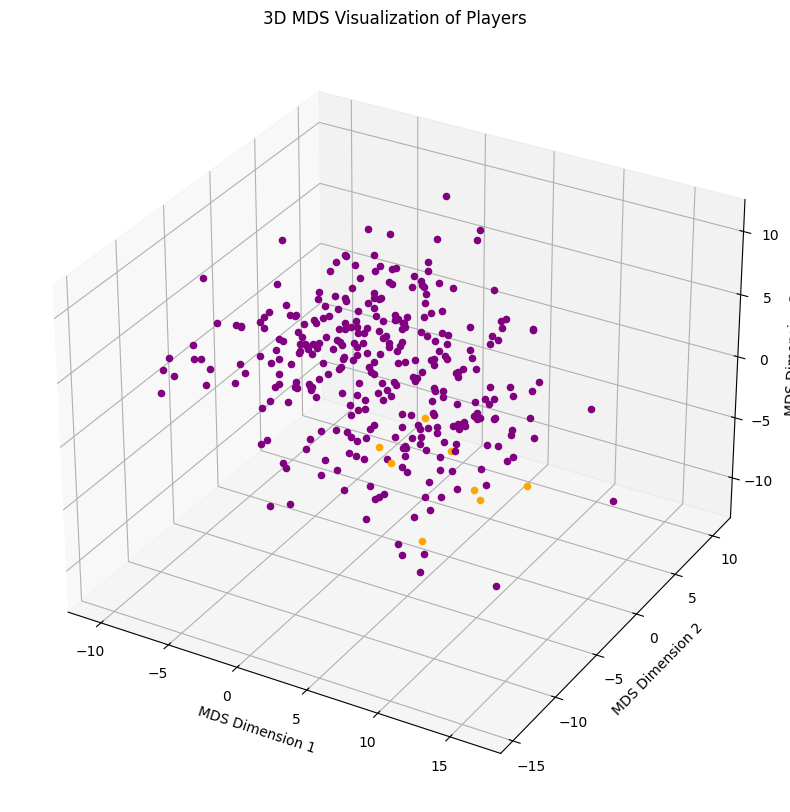

In [54]:
mds = MDS(n_components=3, random_state=42, normalized_stress='auto')
mds_result = mds.fit_transform(scaled_features_nn)

plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')
for i, player in enumerate(combined_df['Player']):
    x, y, z = mds_result[i, 0], mds_result[i, 1], mds_result[i, 2]
    if player in highlighted_players:
        ax.scatter(x, y, z, color='orange', label=player)
    else:
        ax.scatter(x, y, z, color='purple')
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')
ax.set_zlabel('MDS Dimension 3')
ax.set_title('3D MDS Visualization of Players')
plt.show()

Finally, we have created an interactive 3D plot of the 6 players under 24 closest to Miedema via Nearest Neighbours.

In [55]:
import plotly.graph_objects as go

fig = go.Figure()
for i, player in enumerate(combined_df['Player']):
    if player in highlighted_players:
        fig.add_trace(go.Scatter3d(x=[mds_result[i, 0]], y=[mds_result[i, 1]], z=[mds_result[i, 2]],
                                   mode='markers+text', text=[player],
                                   textposition='bottom center',
                                   marker=dict(color='orange', size=5)))
    else:
        fig.add_trace(go.Scatter3d(x=[mds_result[i, 0]], y=[mds_result[i, 1]], z=[mds_result[i, 2]],
                                   mode='markers', marker=dict(color='purple', size=2)))

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), scene=dict(
                    xaxis_title='MDS Dimension 1',
                    yaxis_title='MDS Dimension 2',
                    zaxis_title='MDS Dimension 3'))
fig.show()